<a href="https://colab.research.google.com/github/rndbblnn/stonks-jupyter/blob/main/charting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
!pip install yfinance
!pip install mplfinance

import yfinance as yf
import mplfinance as mpf
import matplotlib.pyplot as plt
import matplotlib.image  as m_img
import pandas as pd
import numpy as np 
import json
import requests
import urllib.parse
import base64
import warnings
import logging
import io
from datetime import datetime
from PIL import Image

warnings.filterwarnings('ignore')

baseurl = 'https://fe3bd065d952.ngrok.io';
class Direction:
    LONG = 1
    SHORT = 2

def encodeUrl(arg):
  str = arg.replace('.','%2E')
  return urllib.parse.quote(str)

dummyImg = Image.new('RGB', (60, 30), color = 'black')
dummyImg.save('dummy.png')


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [25]:
## last 5 day gainers
q = '\
[d]C.0 / [d]C.5 >= 1.2 \n\
AND [d]H.5 > [d]H.6 \n\
AND [d]L.6 > [d]L.7 \n\
AND [d]H.6 <= [d]H.7 \n\
AND [d]C.0 > [d]AVGC50.0 \n\
AND (\n\
  [d]C.0 > [d]C.1 \n\
  AND [d]C.1 > [d]C.2 \n\
  AND [d]C.2 > [d]C.3 \n\
  AND [d]C.3 > [d]C.4 \n\
  AND [d]C.4 > [d]C.5 \n\
)\n\
AND (\n\
    [d]DV.0 > 1.0 \n\
    OR [d]MINDV3.1 > 2.0\n\
    OR [d]AVGDV20.0 > 3.0\n\
)\n\
AND (\n\
    [d]ATR1.0 > 8.0 \n\
    OR [d]ATR20.0 > 5.0 \n\
    OR [d]ATR20.20 > 5.0 \n\
    OR [d]ATR20.40 > 5.0 \n\
)\
';

try:
  r = requests.post(baseurl + '/search', data={'q': q})
  df = pd.DataFrame(r.json()['payload'])
except Exception as e:
  logging.error(f"Exception Name: {type(e).__name__}")
  logging.error(f"Exception Desc: {e}")
  print(r)
  print(r.text)
  raise e

df['patternTime'] = pd.to_datetime(df['patternTime'])
print(df.head)


<bound method NDFrame.head of    symbol patternTime
0    FMTX  2022-09-01
1    ARCH  2022-08-16
2    HRTX  2022-08-12
3    AURA  2022-08-10
4    CERE  2022-08-10
5    PLRX  2022-08-10
6    SGML  2022-08-10
7    FMTX  2022-08-09
8    ADPT  2022-08-08
9    AEHR  2022-08-08
10    AYX  2022-08-08
11   BCRX  2022-08-08
12   FUBO  2022-08-08
13   KYMR  2022-08-08
14   MNKD  2022-08-08
15   REAL  2022-08-08
16   TSVT  2022-08-08
17      U  2022-08-08
18   ENTA  2022-08-05
19   ZETA  2022-08-05
20    OLO  2022-08-04
21     BE  2022-08-03
22   CELH  2022-08-03
23    DTC  2022-08-03
24   HSCS  2022-08-03
25   AMRC  2022-08-02
26    HKD  2022-08-02
27   AVTE  2022-08-01
28   ARRY  2022-07-29
29   VICR  2022-07-27
30   PBTS  2022-07-22
31   CCRN  2022-07-21
32   BEAM  2022-07-19
33   SANA  2022-07-08
34   GERN  2022-07-01
35   ABOS  2022-06-29
36   GERN  2022-06-28
37   SMFL  2022-06-28
38   AVEO  2022-06-27
39   BEAM  2022-06-23
40   FOLD  2022-06-23
41   ACLX  2022-06-09
42   DCFC  2022-05-27
43

FMTX (2022-09-01)
prevday:            symbol   open   high    low  close  volume
tickTime                                             
2022-08-24   None  11.93  12.05  11.72  11.93  149919


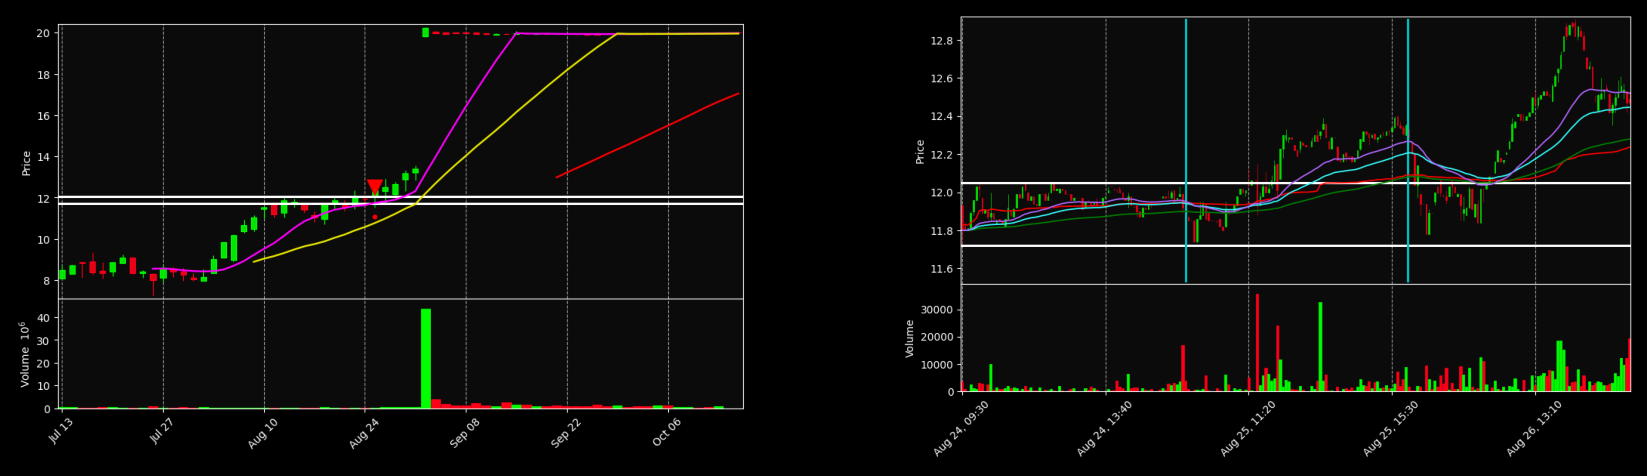

ARCH (2022-08-16)
prevday:            symbol    open    high    low   close  volume
tickTime                                                
2022-08-08   None  125.26  128.49  124.5  126.56  446018


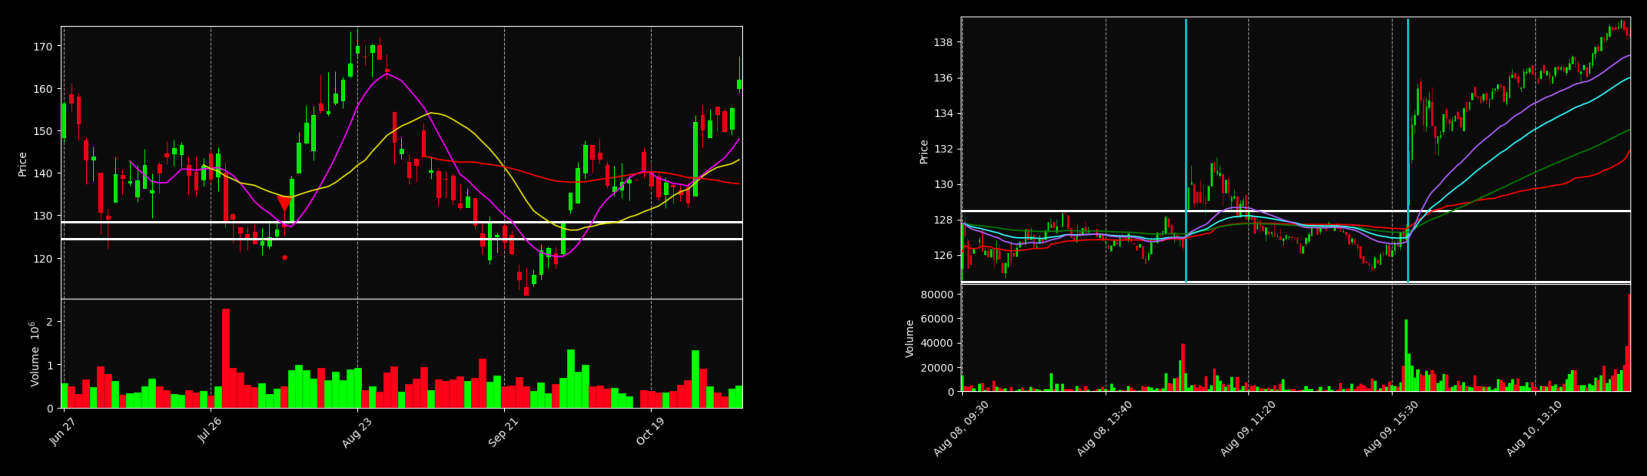

HRTX (2022-08-12)
prevday:            symbol  open  high  low  close   volume
tickTime                                          
2022-08-04   None  2.97  3.08  2.9   2.94  2980694
<class 'ValueError'>
User specified line date "2022-08-05 16:00:00" is beyond (greater than) range of plotted data (2022-08-04 09:30:00 to 2022-08-05 15:55:00).
<Response [200]>
{"payload":[{"symbol":null,"open":2.97,"high":3.01,"low":2.97,"close":3.01,"volume":28956,"tickTime":"2022-08-04T09:30:00"},{"symbol":null,"open":3.01,"high":3.08,"low":3.0,"close":3.05,"volume":44775,"tickTime":"2022-08-04T09:35:00"},{"symbol":null,"open":3.06,"high":3.07,"low":3.04,"close":3.07,"volume":21784,"tickTime":"2022-08-04T09:40:00"},{"symbol":null,"open":3.07,"high":3.08,"low":3.02,"close":3.02,"volume":24055,"tickTime":"2022-08-04T09:45:00"},{"symbol":null,"open":3.03,"high":3.05,"low":3.02,"close":3.02,"volume":17006,"tickTime":"2022-08-04T09:50:00"},{"symbol":null,"open":3.02,"high":3.05,"low":3.01,"close":3.03,"volume"

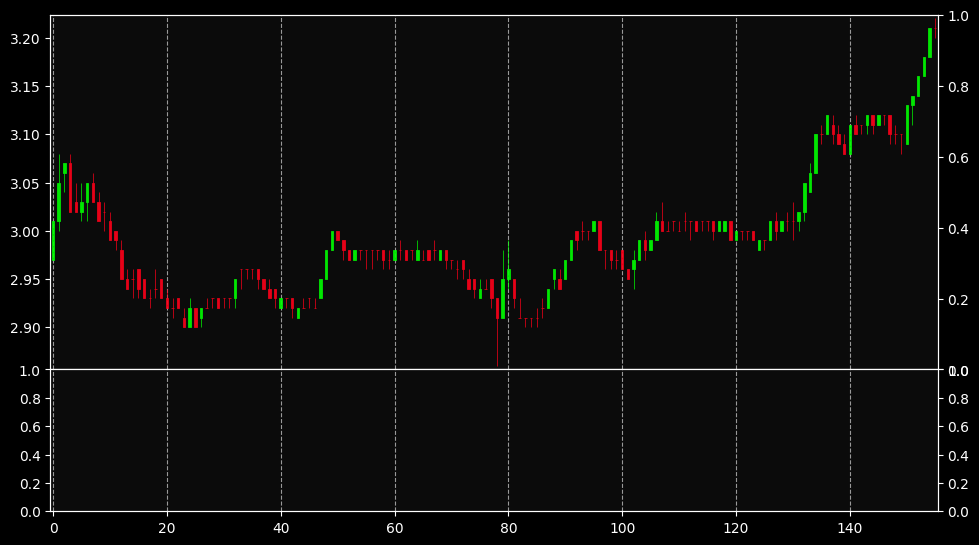

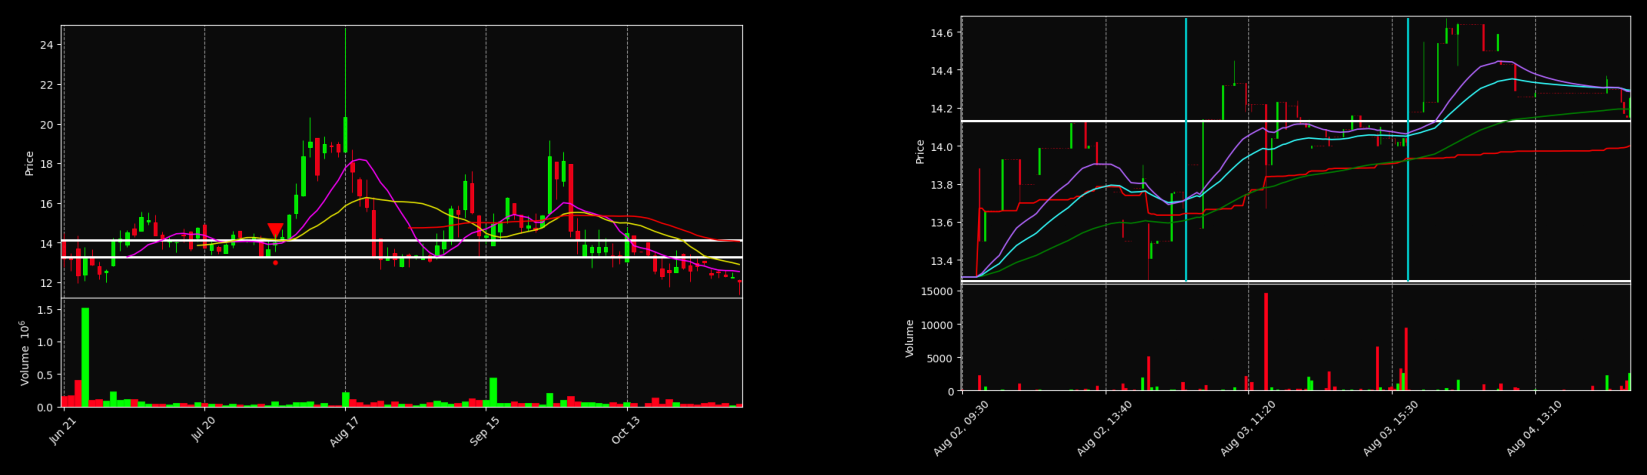

CERE (2022-08-10)
prevday:            symbol   open  high    low  close  volume
tickTime                                            
2022-08-02   None  27.43  29.4  27.43  28.63  377059


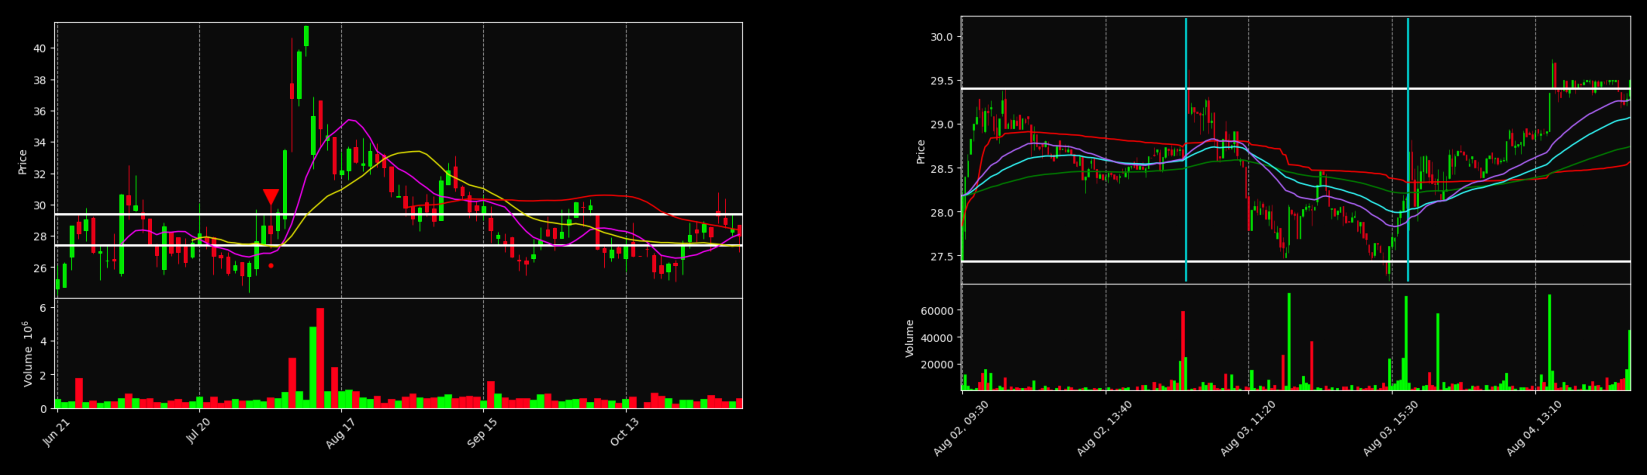

PLRX (2022-08-10)
prevday:            symbol   open   high    low  close  volume
tickTime                                             
2022-08-02   None  16.31  17.43  16.31  17.29  373422


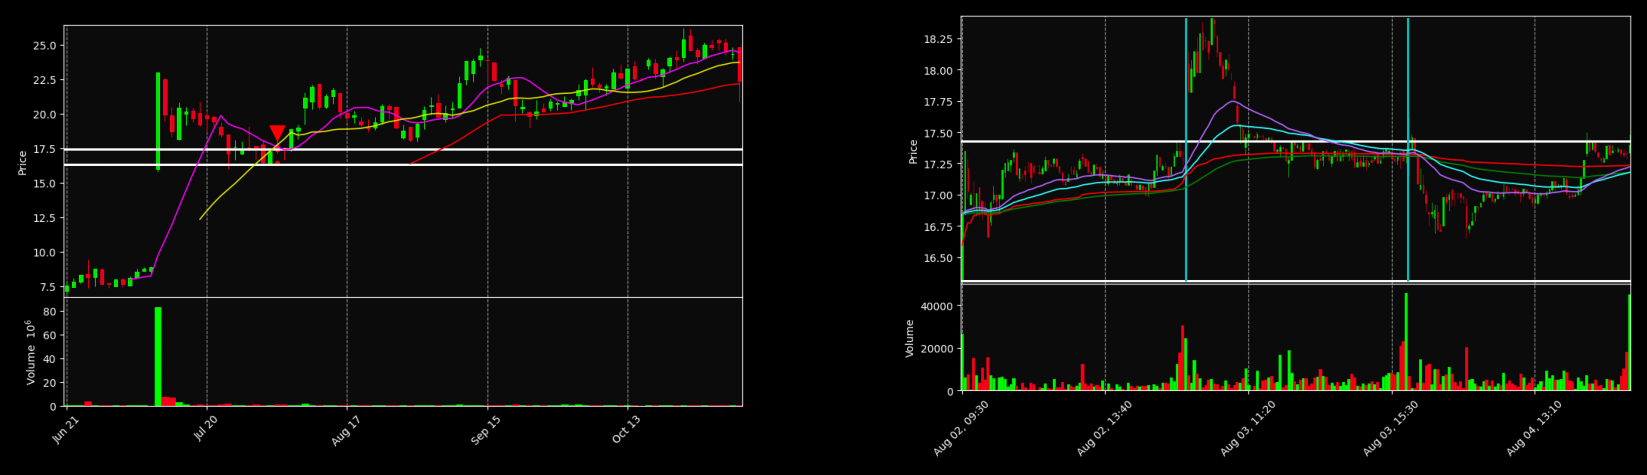

SGML (2022-08-10)
prevday:            symbol  open  high    low  close  volume
tickTime                                           
2022-08-02   None  17.9  18.2  17.61  17.84  178675


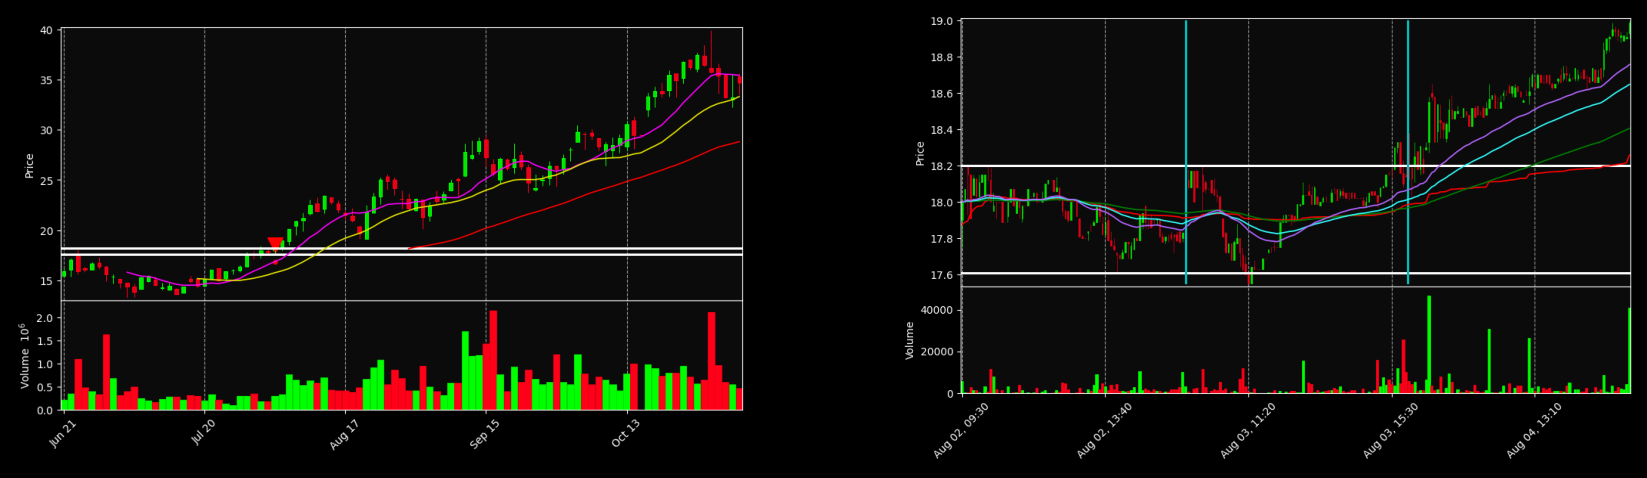

FMTX (2022-08-09)
prevday:            symbol  open  high   low  close  volume
tickTime                                          
2022-08-01   None   8.1  8.35  7.98   8.03  331135


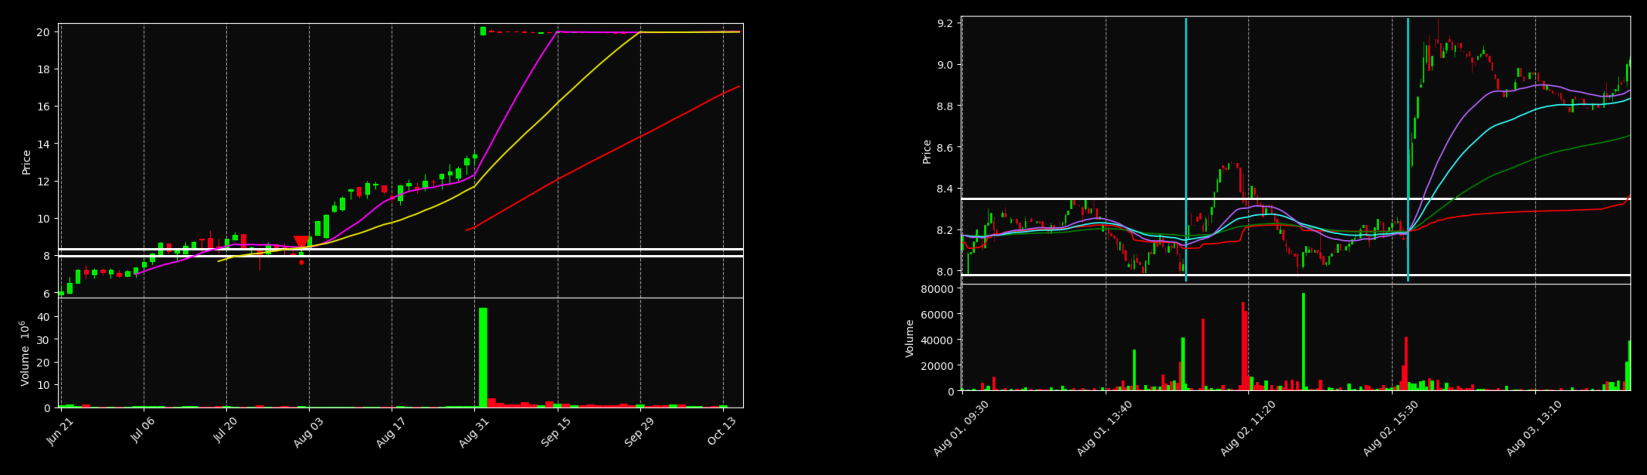

ADPT (2022-08-08)
prevday:            symbol  open  high  low  close   volume
tickTime                                          
2022-07-29   None  9.25  9.33  8.8   9.16  1418576


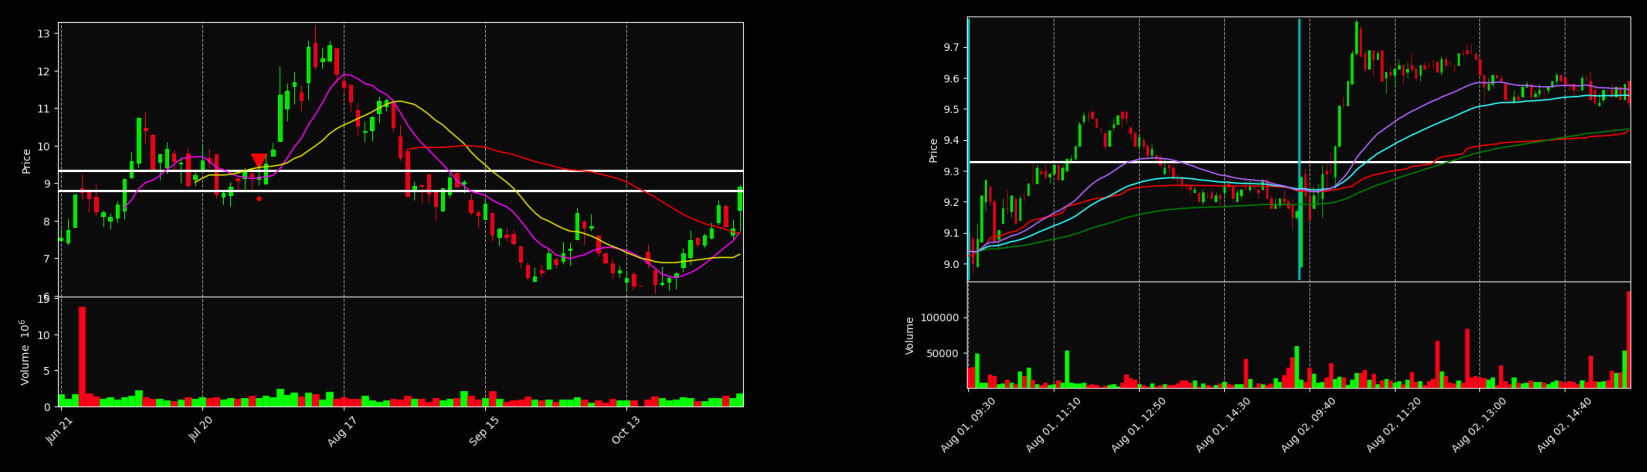

AEHR (2022-08-08)
prevday:            symbol   open   high    low  close  volume
tickTime                                             
2022-07-29   None  11.27  11.53  11.01  11.41  539038


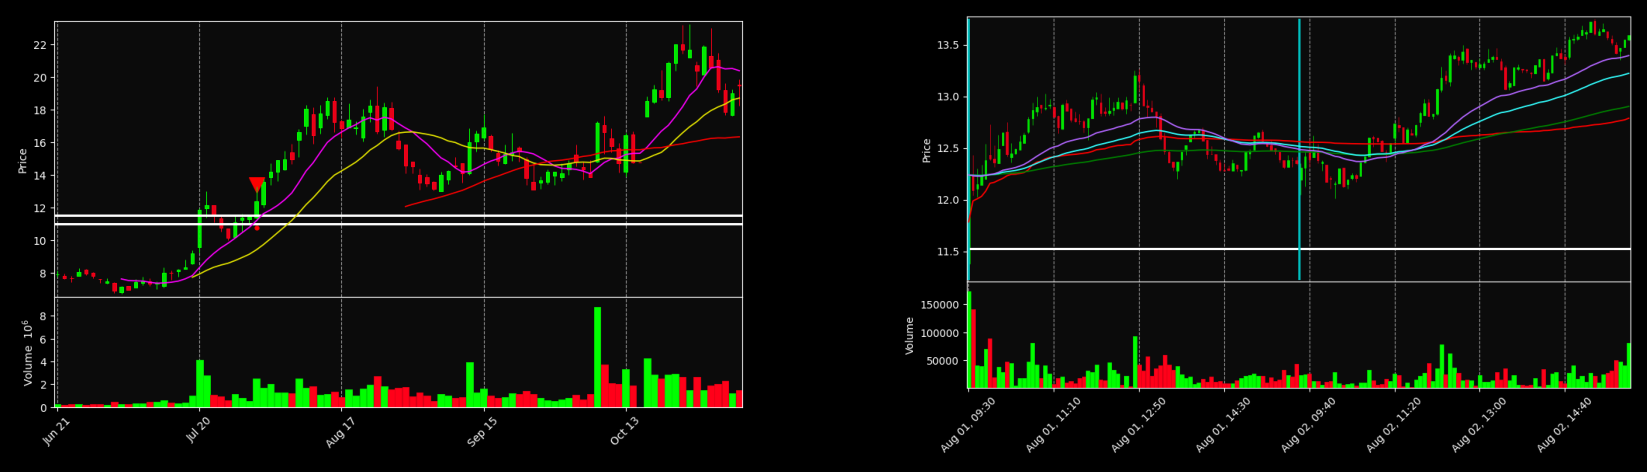

AYX (2022-08-08)
prevday:            symbol   open   high    low  close  volume
tickTime                                             
2022-07-29   None  48.35  48.58  46.71  48.43  794566


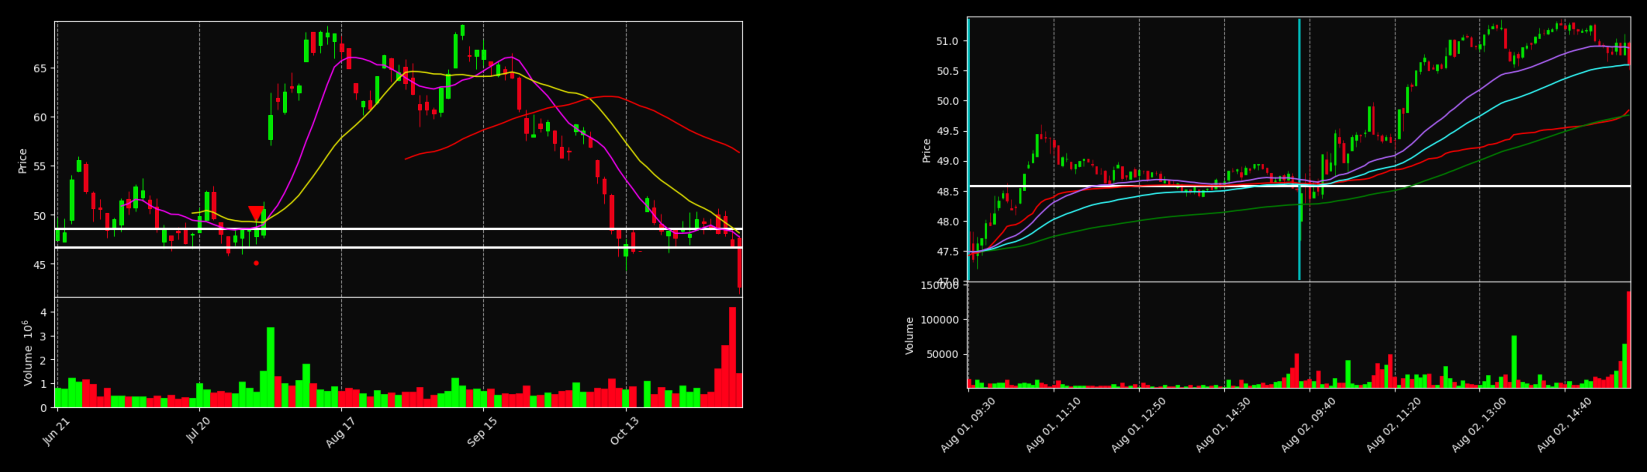

BCRX (2022-08-08)
prevday:            symbol   open   high    low  close   volume
tickTime                                              
2022-07-29   None  10.93  11.07  10.65  11.02  1837815


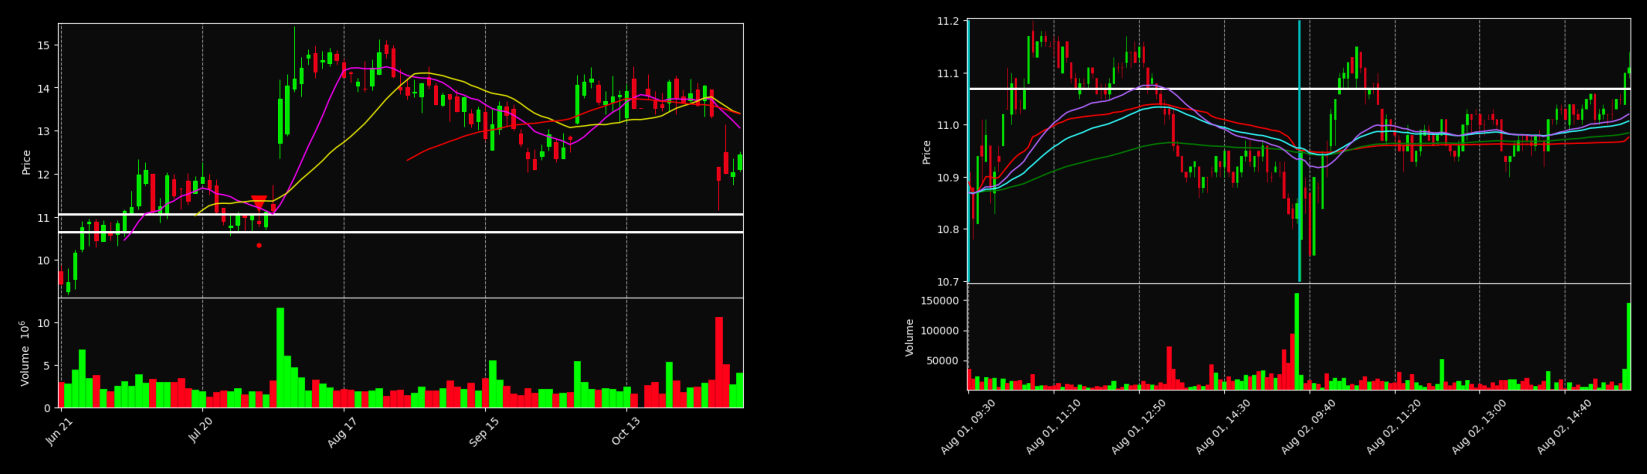

FUBO (2022-08-08)
prevday:            symbol  open  high   low  close   volume
tickTime                                           
2022-07-29   None  2.45  2.51  2.39   2.51  6524856


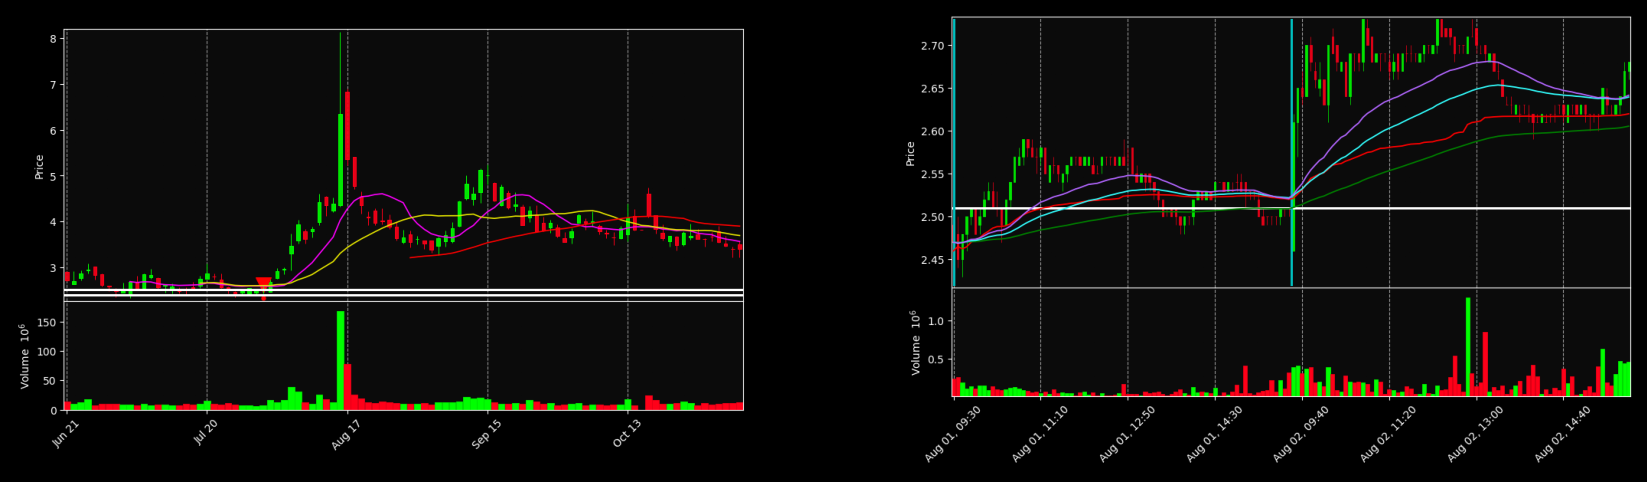

KYMR (2022-08-08)
prevday:            symbol   open   high    low  close  volume
tickTime                                             
2022-07-29   None  22.13  22.13  21.35  22.03  336891


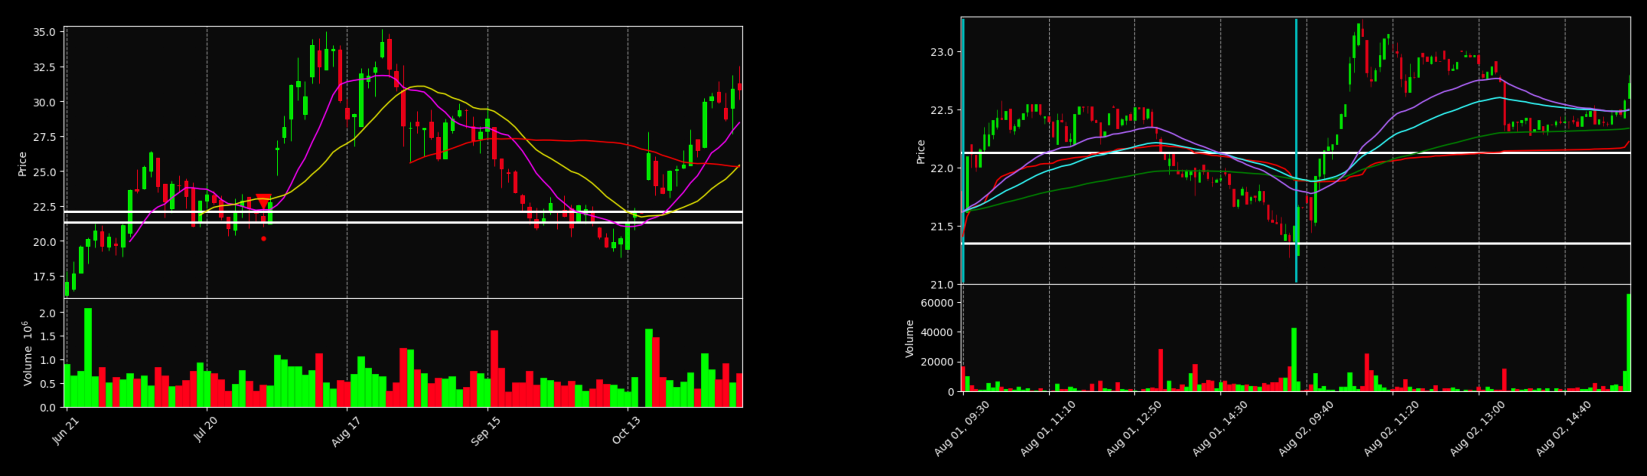

MNKD (2022-08-08)
prevday:            symbol  open  high  low  close   volume
tickTime                                          
2022-07-29   None  3.47  3.52  3.4   3.45  2198871


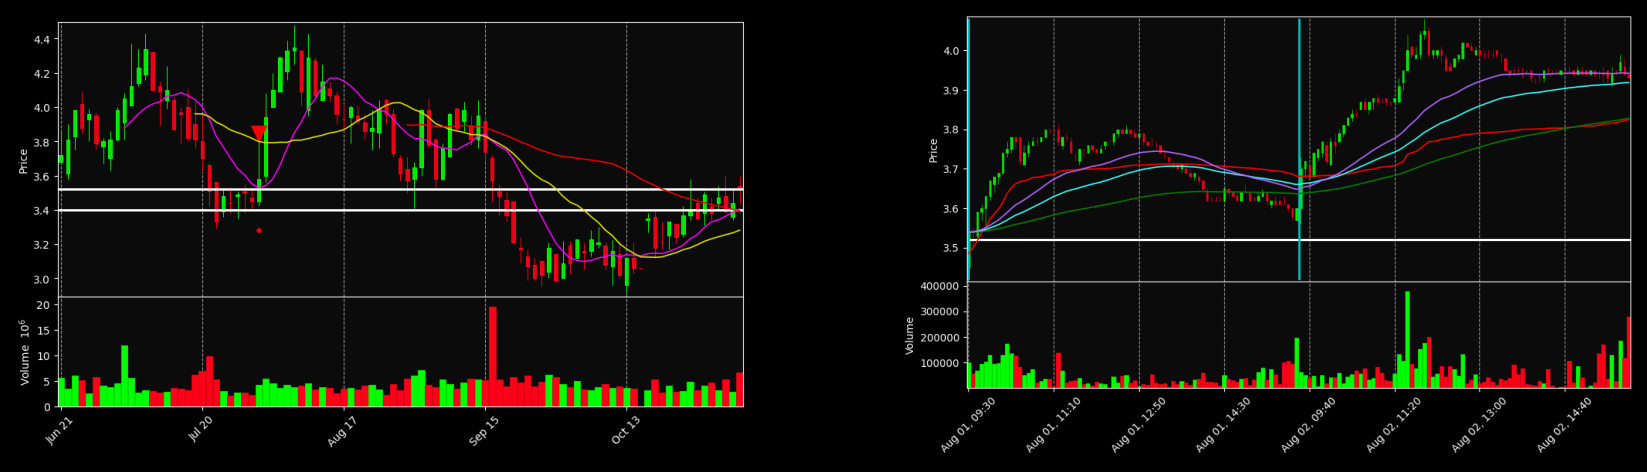

REAL (2022-08-08)
prevday:            symbol  open  high   low  close   volume
tickTime                                           
2022-07-29   None  2.38  2.43  2.28   2.33  3463514


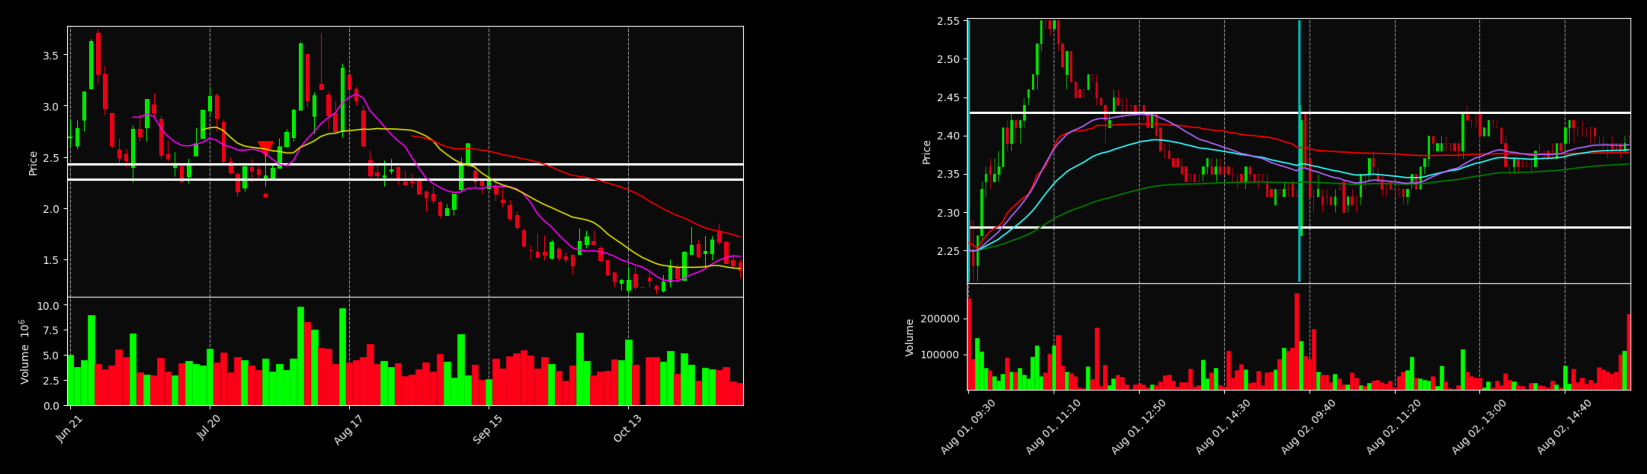

TSVT (2022-08-08)
prevday:            symbol   open   high   low  close  volume
tickTime                                            
2022-07-29   None  14.43  14.44  13.9  14.39  346280


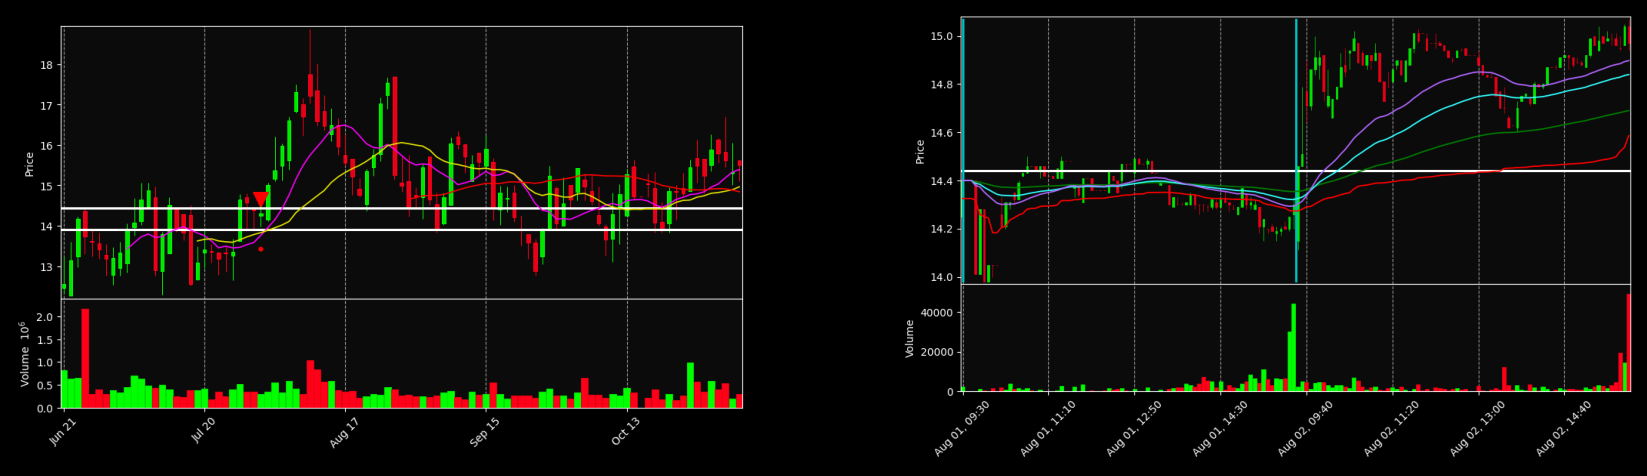

U (2022-08-08)
prevday:            symbol  open   high    low  close   volume
tickTime                                             
2022-07-29   None  37.0  37.39  35.91  37.39  6248584


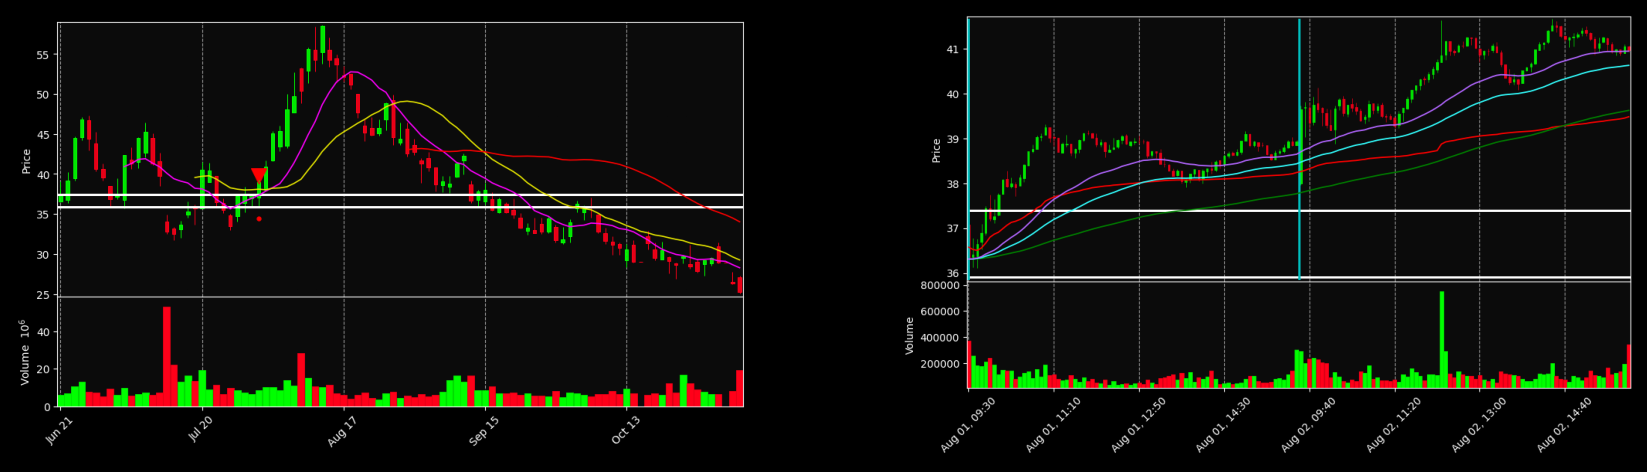

ENTA (2022-08-05)
prevday:            symbol   open   high    low  close  volume
tickTime                                             
2022-07-28   None  50.38  50.58  48.07   49.7  109844
<class 'ValueError'>
User specified line date "2022-07-29 16:00:00" is beyond (greater than) range of plotted data (2022-07-28 09:30:00 to 2022-07-29 15:55:00).
<Response [200]>
{"payload":[{"symbol":null,"open":50.38,"high":50.38,"low":49.88,"close":49.88,"volume":848,"tickTime":"2022-07-28T09:30:00"},{"symbol":null,"open":49.88,"high":49.88,"low":49.3,"close":49.3,"volume":1212,"tickTime":"2022-07-28T09:35:00"},{"symbol":null,"open":49.3,"high":49.3,"low":48.85,"close":48.86,"volume":2269,"tickTime":"2022-07-28T09:40:00"},{"symbol":null,"open":48.86,"high":49.2,"low":48.86,"close":49.2,"volume":574,"tickTime":"2022-07-28T09:45:00"},{"symbol":null,"open":49.2,"high":49.2,"low":49.2,"close":49.2,"volume":0,"tickTime":"2022-07-28T09:50:00"},{"symbol":null,"open":48.99,"high":48.99,"low":48.07,"close":

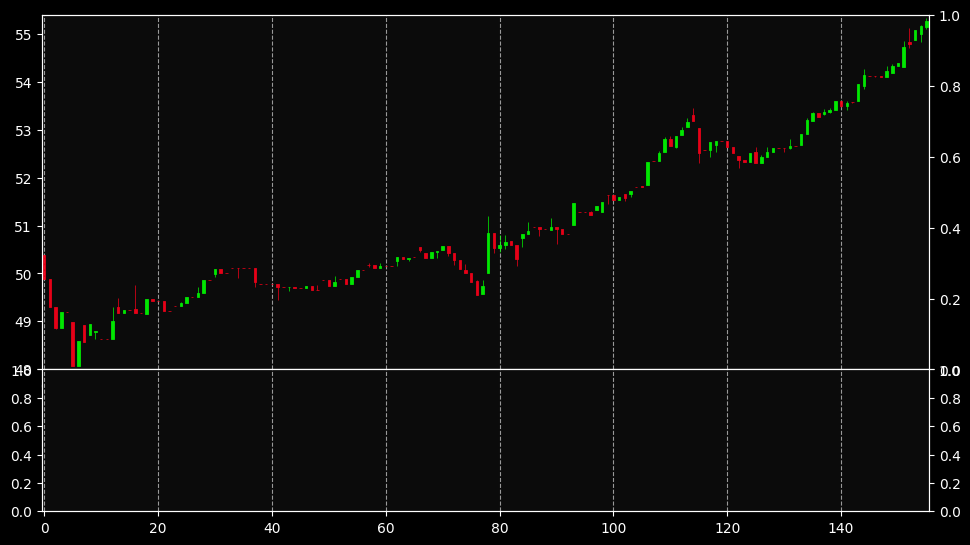

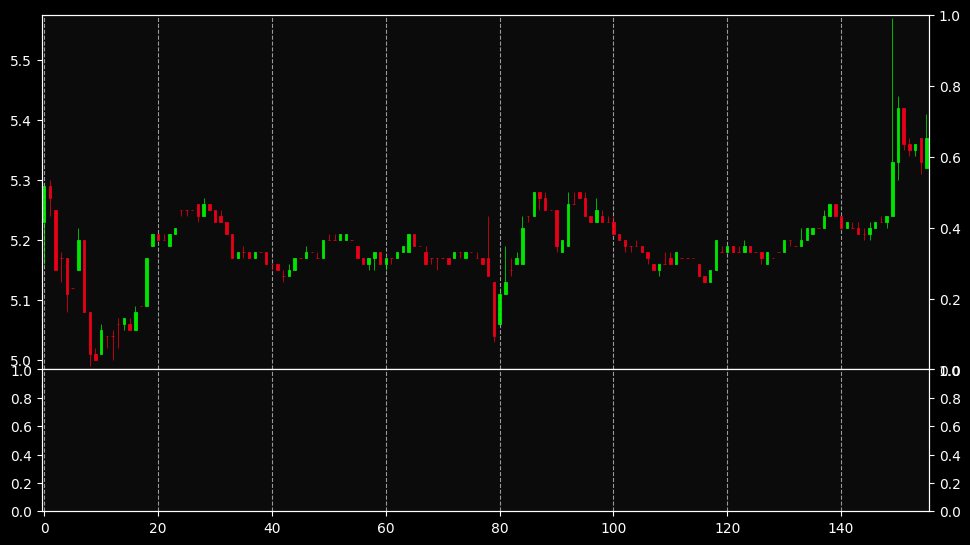

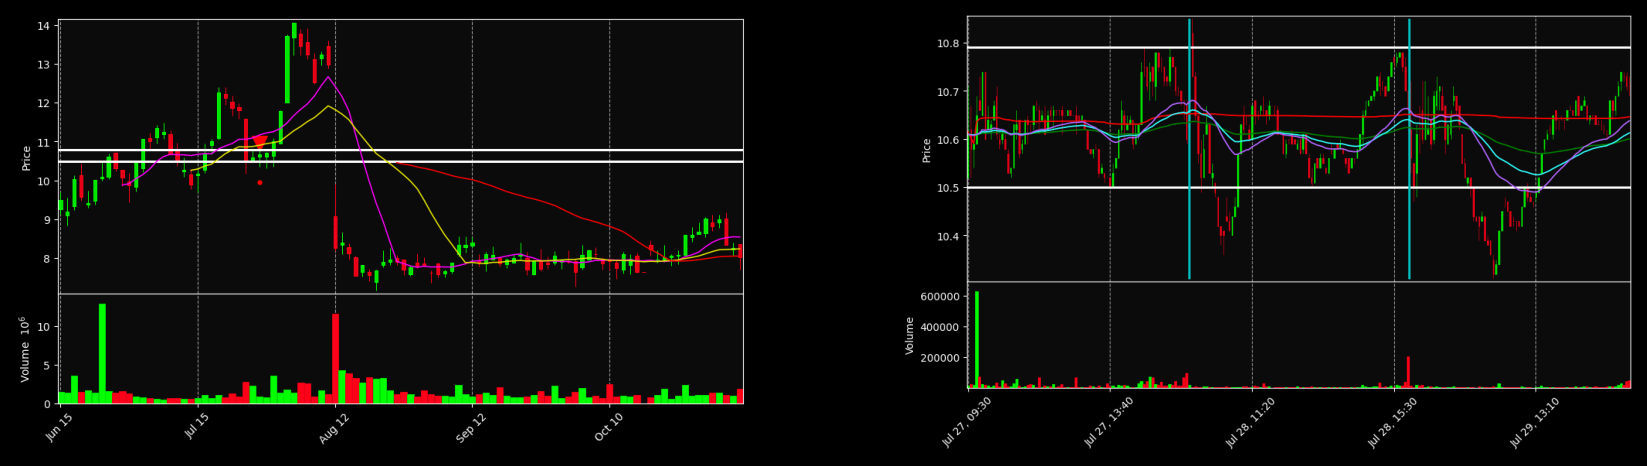

BE (2022-08-03)
prevday:            symbol  open   high    low  close   volume
tickTime                                             
2022-07-26   None  16.9  17.07  16.29  16.44  1036202


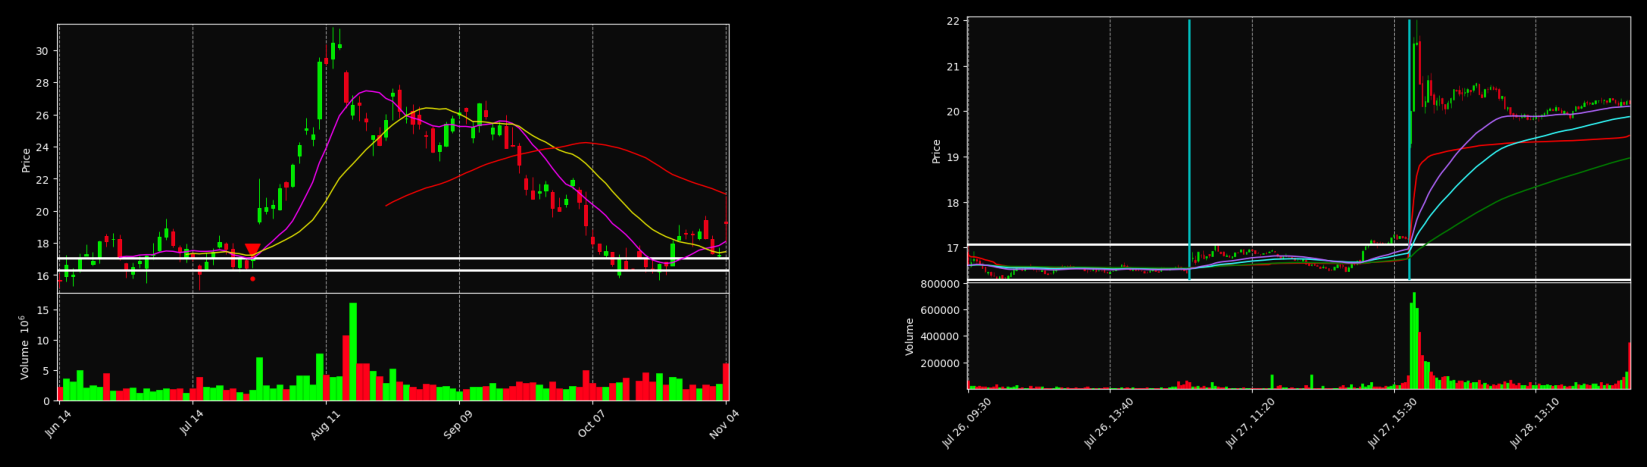

CELH (2022-08-03)
prevday:            symbol   open   high    low  close  volume
tickTime                                             
2022-07-26   None  82.99  82.99  80.55  81.89  521429


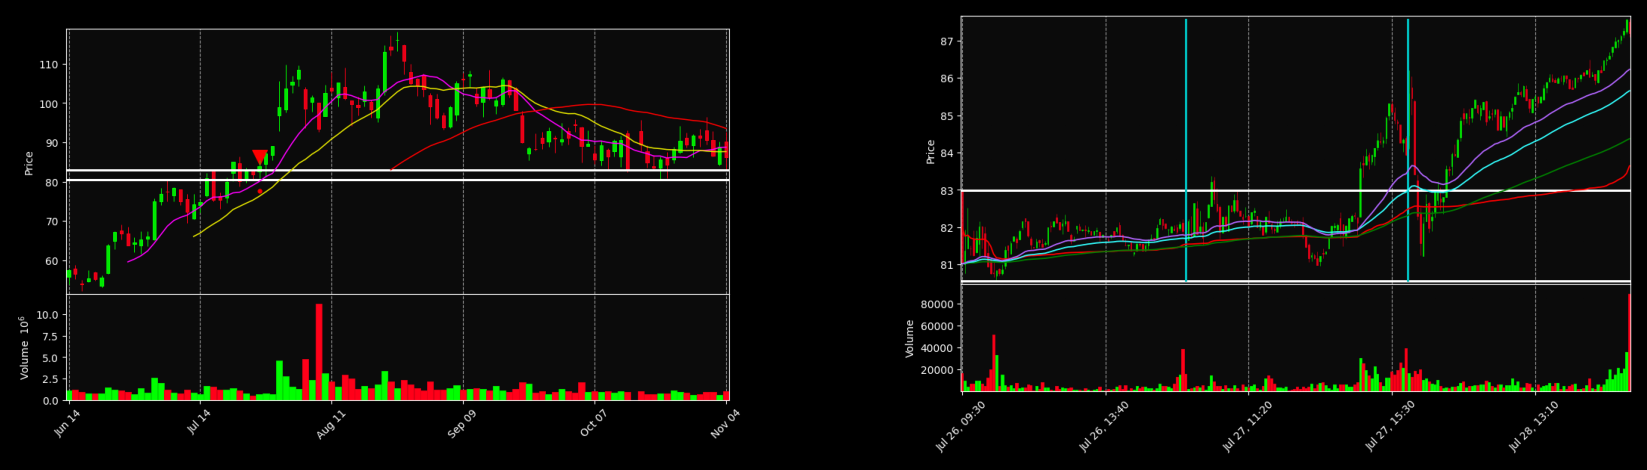

DTC (2022-08-03)
prevday:            symbol  open  high  low  close  volume
tickTime                                         
2022-07-26   None  4.01  4.34  4.0   4.17  589855


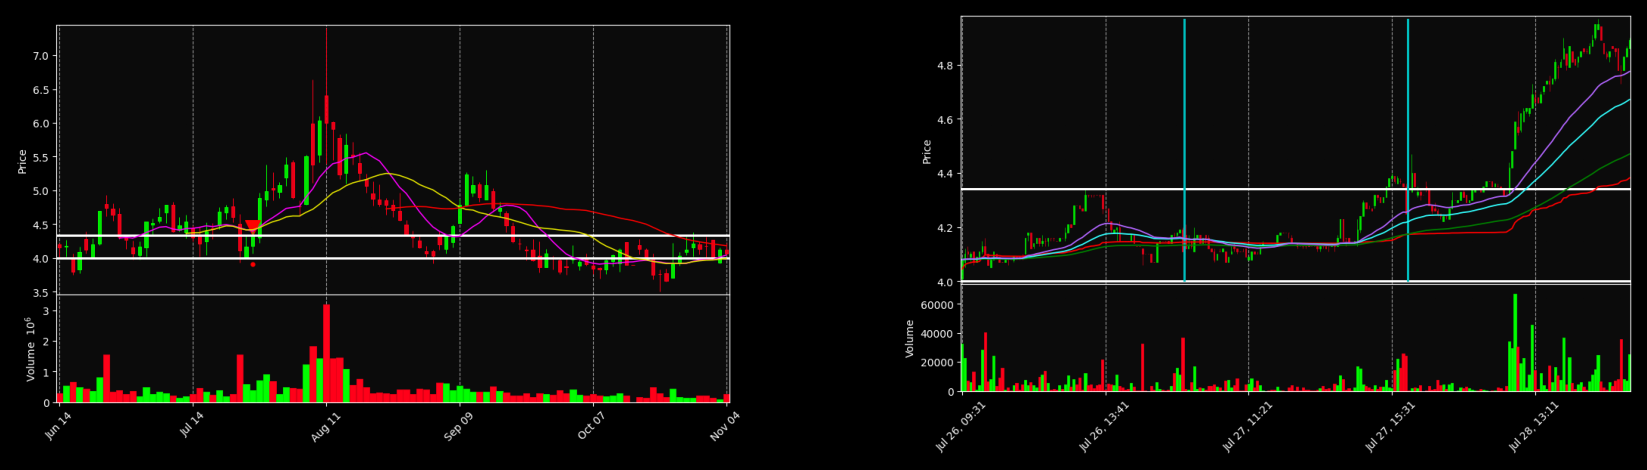

HSCS (2022-08-03)
prevday:            symbol  open  high  low  close  volume
tickTime                                         
2022-07-26   None  1.38  1.38  1.3   1.33   63510


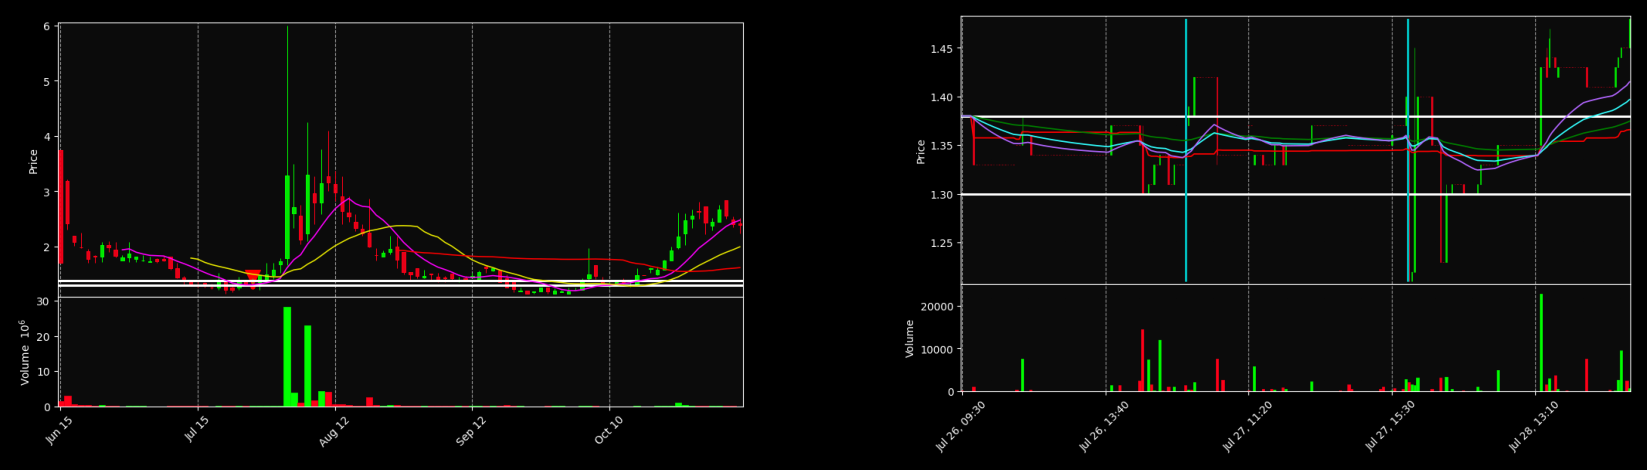

AMRC (2022-08-02)
prevday:            symbol   open   high    low  close  volume
tickTime                                             
2022-07-25   None  45.97  46.64  45.02   46.5  227584


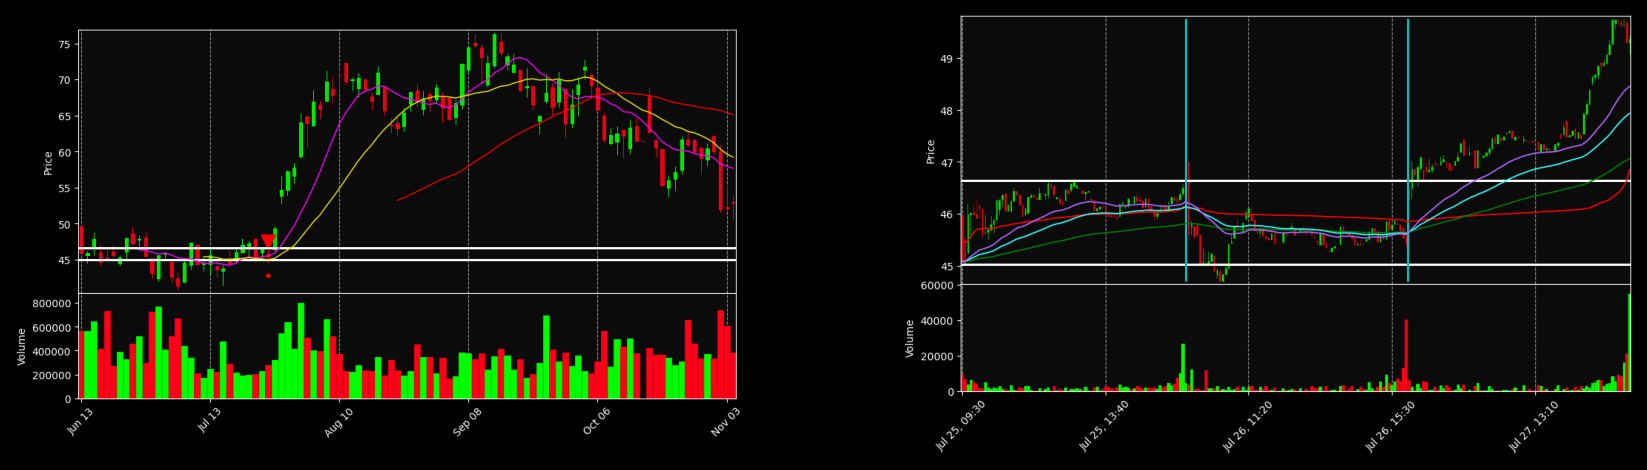

HKD (2022-08-02)
prevday:            symbol  open  high   low  close   volume
tickTime                                           
2022-07-25   None  57.7  57.7  38.5  43.85  1233903


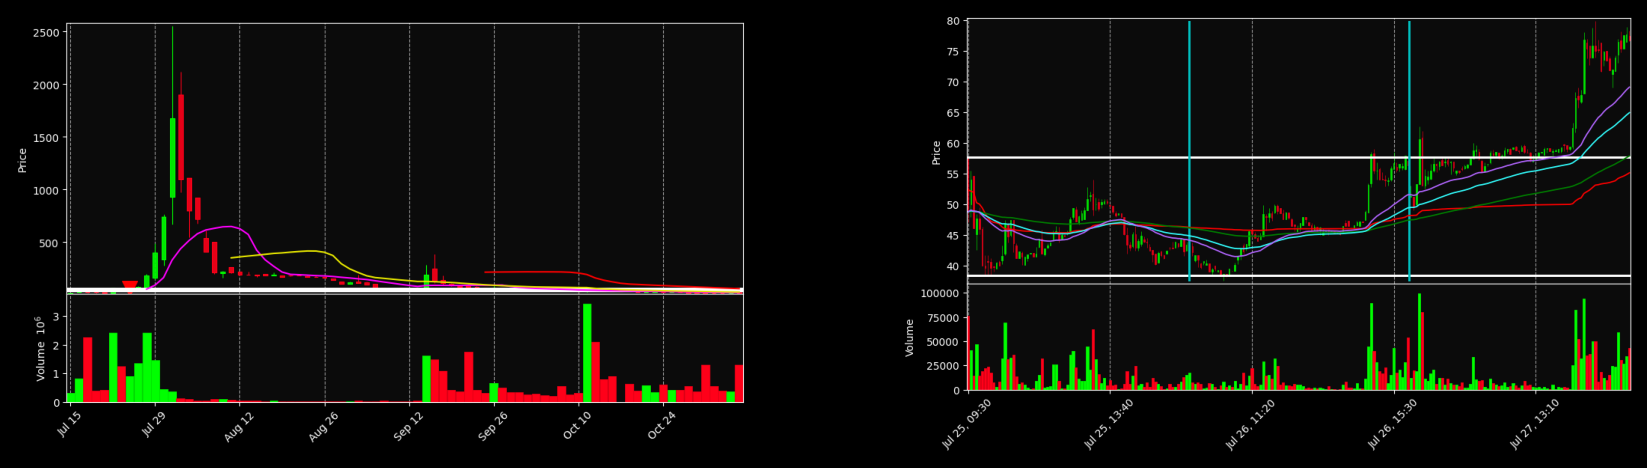

AVTE (2022-08-01)
prevday:            symbol  open  high   low  close  volume
tickTime                                          
2022-07-22   None  18.2  18.9  17.8   18.1  153796


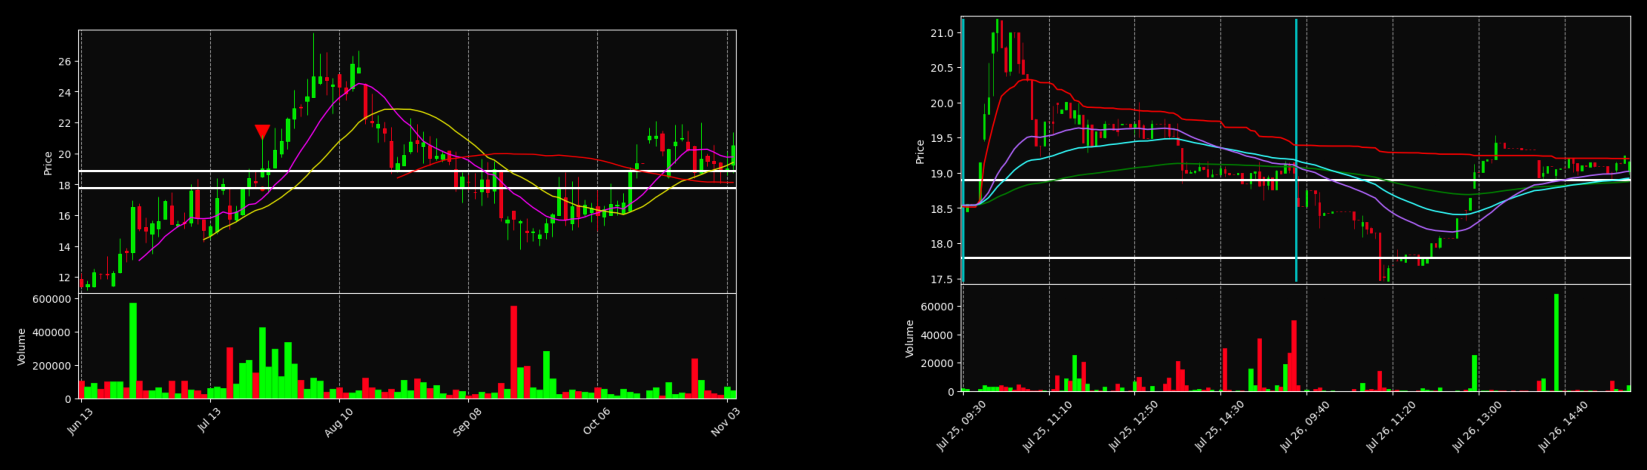

ARRY (2022-07-29)
prevday:            symbol   open   high    low  close   volume
tickTime                                              
2022-07-21   None  11.93  12.11  11.59  12.01  1691285
<class 'ValueError'>
User specified line date "2022-07-22 16:00:00" is beyond (greater than) range of plotted data (2022-07-21 09:30:00 to 2022-07-22 15:55:00).
<Response [200]>
{"payload":[{"symbol":null,"open":11.93,"high":12.11,"low":11.93,"close":11.99,"volume":75469,"tickTime":"2022-07-21T09:30:00"},{"symbol":null,"open":11.95,"high":11.95,"low":11.65,"close":11.85,"volume":45636,"tickTime":"2022-07-21T09:35:00"},{"symbol":null,"open":11.84,"high":11.86,"low":11.66,"close":11.66,"volume":19168,"tickTime":"2022-07-21T09:40:00"},{"symbol":null,"open":11.65,"high":11.74,"low":11.61,"close":11.66,"volume":18143,"tickTime":"2022-07-21T09:45:00"},{"symbol":null,"open":11.64,"high":11.81,"low":11.59,"close":11.81,"volume":19968,"tickTime":"2022-07-21T09:50:00"},{"symbol":null,"open":11.83,"high":11.

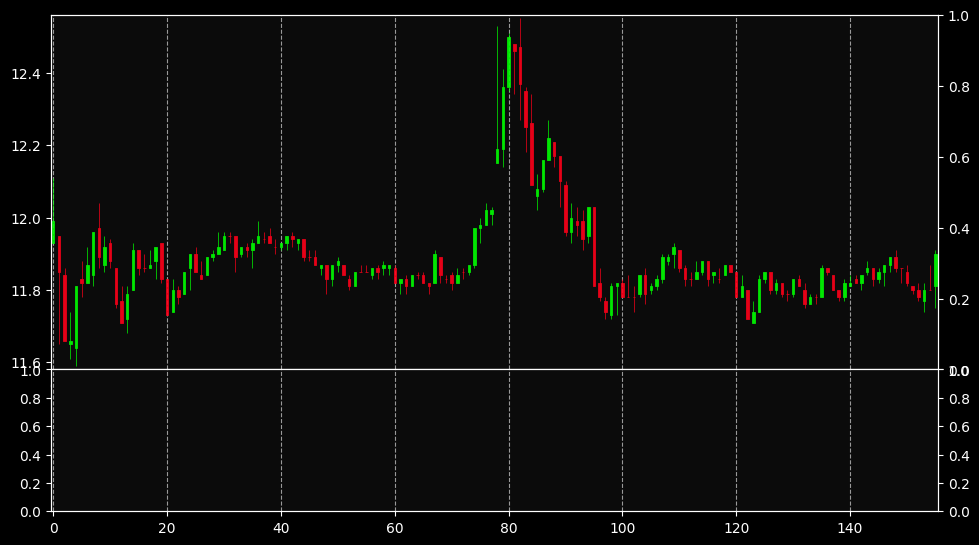

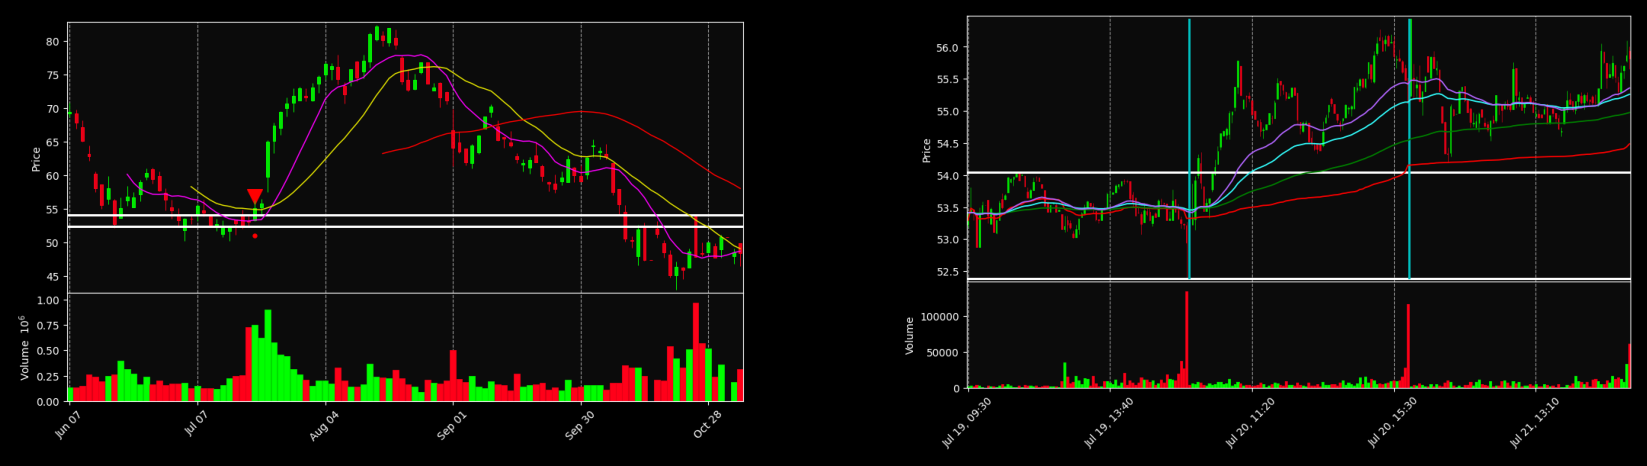

PBTS (2022-07-22)
prevday:            symbol  open  high   low  close   volume
tickTime                                           
2022-07-14   None  0.77  0.85  0.75   0.85  2697409
<class 'ValueError'>
User specified line date "2022-07-15 16:00:00" is beyond (greater than) range of plotted data (2022-07-14 09:30:00 to 2022-07-15 15:55:00).
<Response [200]>
{"payload":[{"symbol":null,"open":0.77,"high":0.85,"low":0.77,"close":0.82,"volume":347799,"tickTime":"2022-07-14T09:30:00"},{"symbol":null,"open":0.82,"high":0.82,"low":0.77,"close":0.81,"volume":127964,"tickTime":"2022-07-14T09:35:00"},{"symbol":null,"open":0.81,"high":0.82,"low":0.79,"close":0.81,"volume":21513,"tickTime":"2022-07-14T09:40:00"},{"symbol":null,"open":0.8,"high":0.81,"low":0.79,"close":0.8,"volume":19283,"tickTime":"2022-07-14T09:45:00"},{"symbol":null,"open":0.8,"high":0.81,"low":0.77,"close":0.77,"volume":107752,"tickTime":"2022-07-14T09:50:00"},{"symbol":null,"open":0.8,"high":0.82,"low":0.79,"close":0.79,"volu

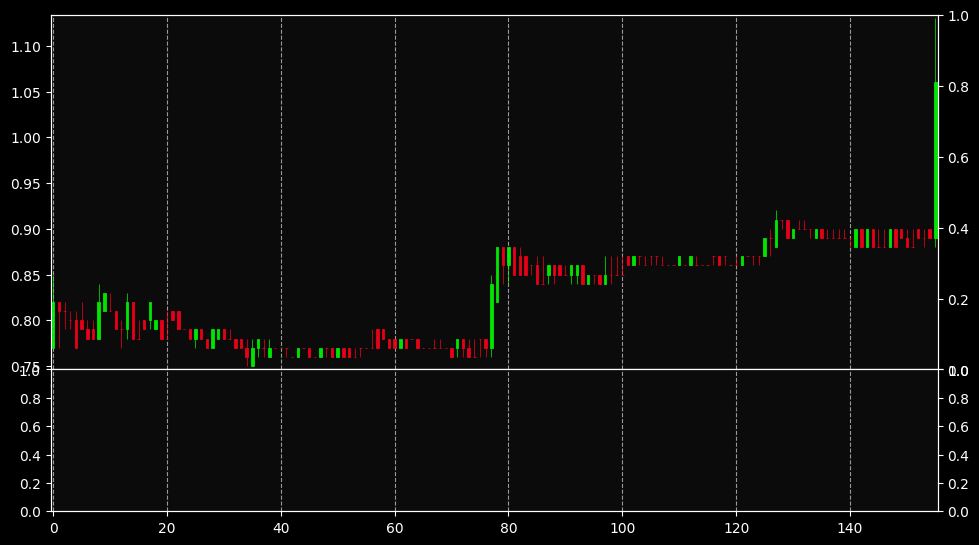

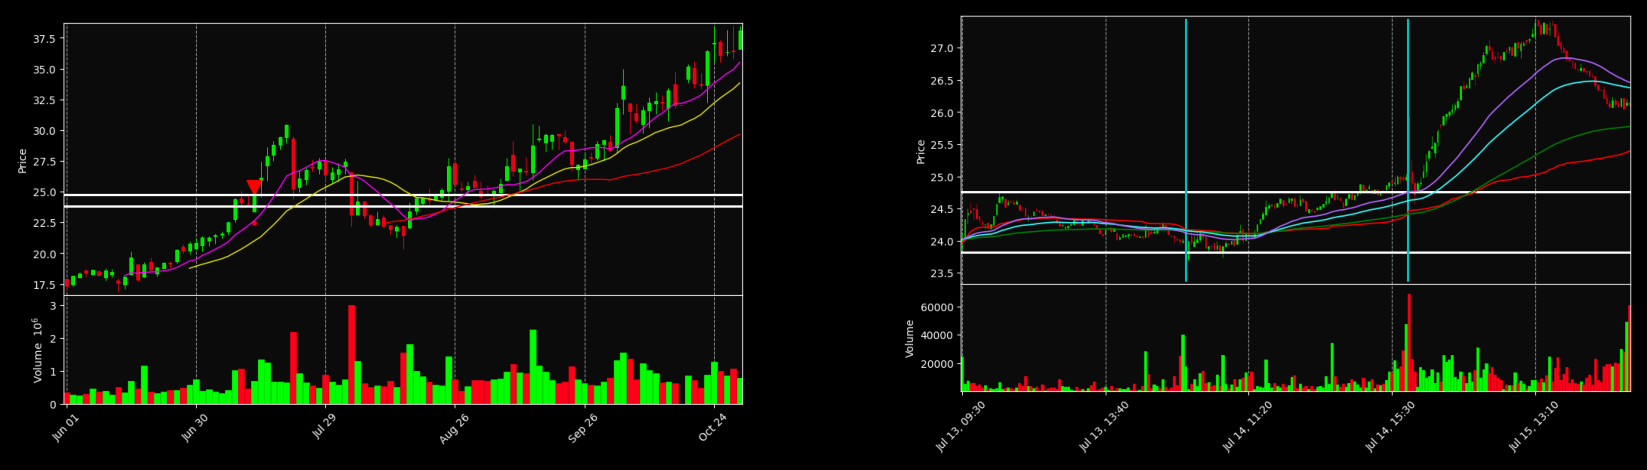

BEAM (2022-07-19)
prevday:            symbol   open   high   low  close   volume
tickTime                                             
2022-07-11   None  51.67  52.63  49.9  50.45  1516531


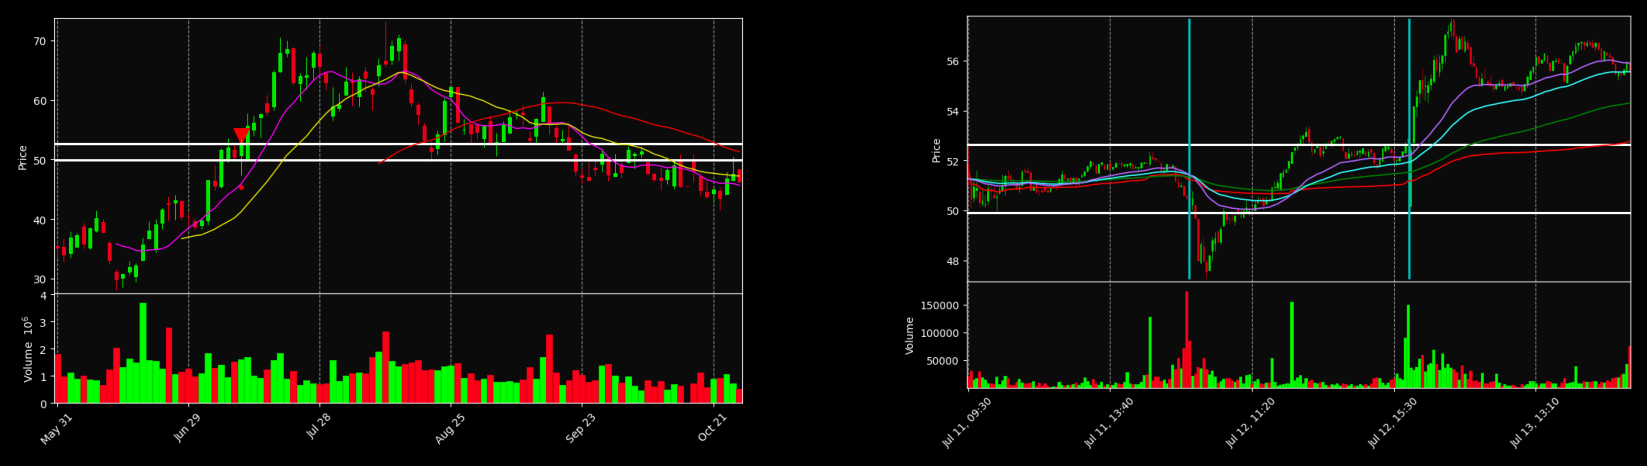

SANA (2022-07-08)
prevday:            symbol  open  high   low  close   volume
tickTime                                           
2022-06-29   None  6.22   6.4  6.11   6.25  1198244


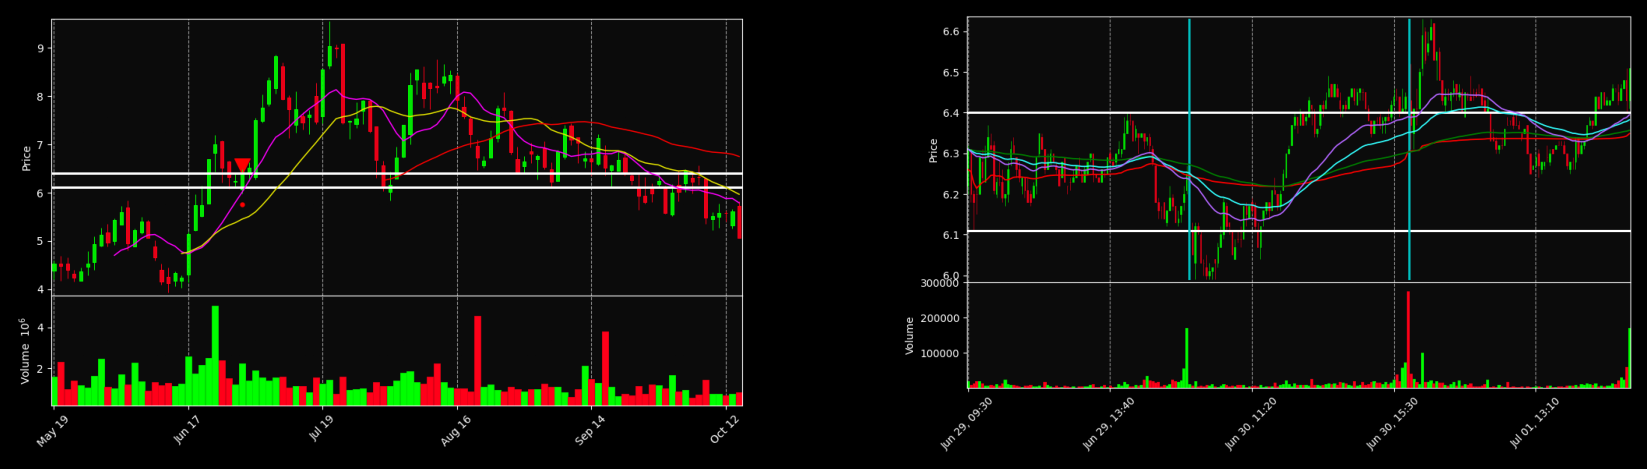

GERN (2022-07-01)
prevday:            symbol  open  high   low  close   volume
tickTime                                           
2022-06-23   None  1.29  1.36  1.28   1.36  2656614
<class 'ValueError'>
User specified line date "2022-06-24 16:00:00" is beyond (greater than) range of plotted data (2022-06-23 09:30:00 to 2022-06-24 15:55:00).
<Response [200]>
{"payload":[{"symbol":null,"open":1.29,"high":1.33,"low":1.29,"close":1.33,"volume":23221,"tickTime":"2022-06-23T09:30:00"},{"symbol":null,"open":1.32,"high":1.33,"low":1.31,"close":1.33,"volume":12238,"tickTime":"2022-06-23T09:35:00"},{"symbol":null,"open":1.33,"high":1.33,"low":1.32,"close":1.32,"volume":6724,"tickTime":"2022-06-23T09:40:00"},{"symbol":null,"open":1.33,"high":1.34,"low":1.33,"close":1.34,"volume":16721,"tickTime":"2022-06-23T09:45:00"},{"symbol":null,"open":1.34,"high":1.34,"low":1.31,"close":1.32,"volume":225240,"tickTime":"2022-06-23T09:50:00"},{"symbol":null,"open":1.32,"high":1.35,"low":1.32,"close":1.35,"vol

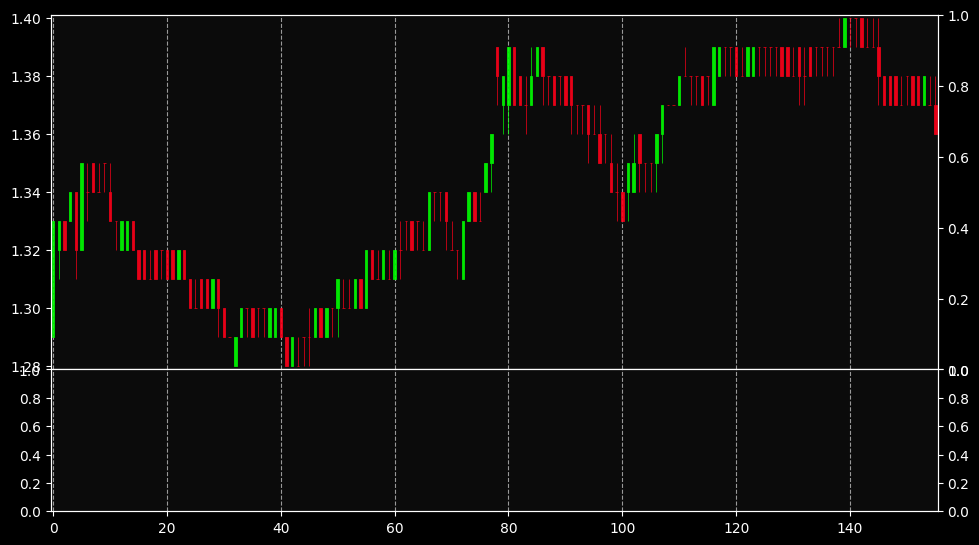

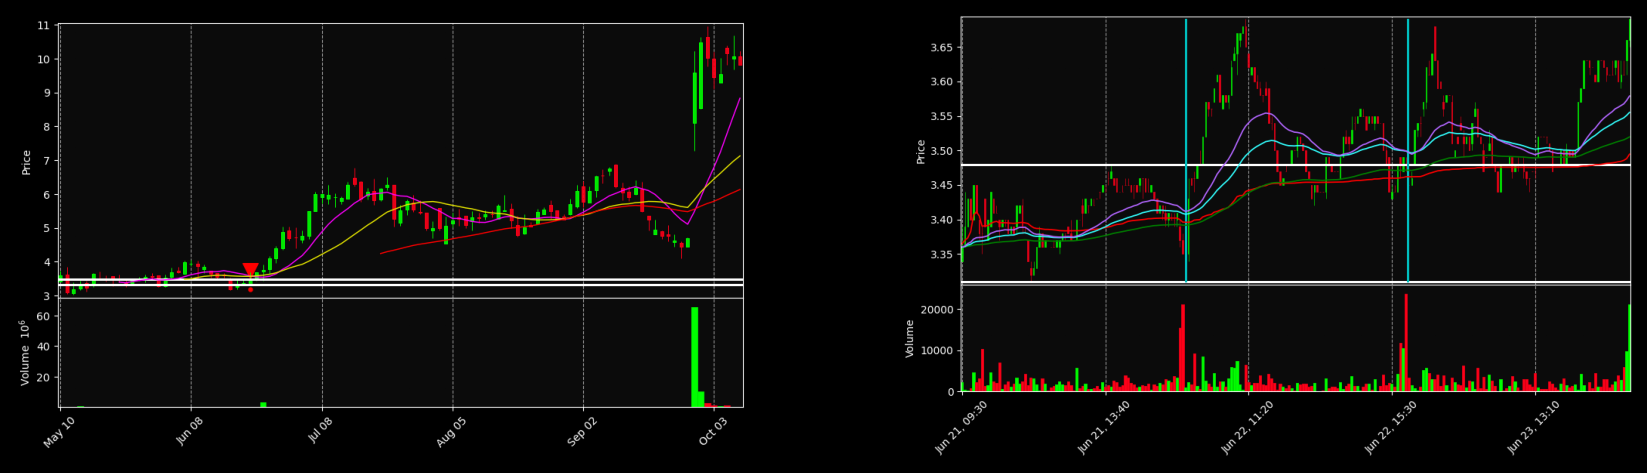

GERN (2022-06-28)
prevday:            symbol  open  high  low  close   volume
tickTime                                          
2022-06-17   None   1.2  1.27  1.2   1.23  8461271


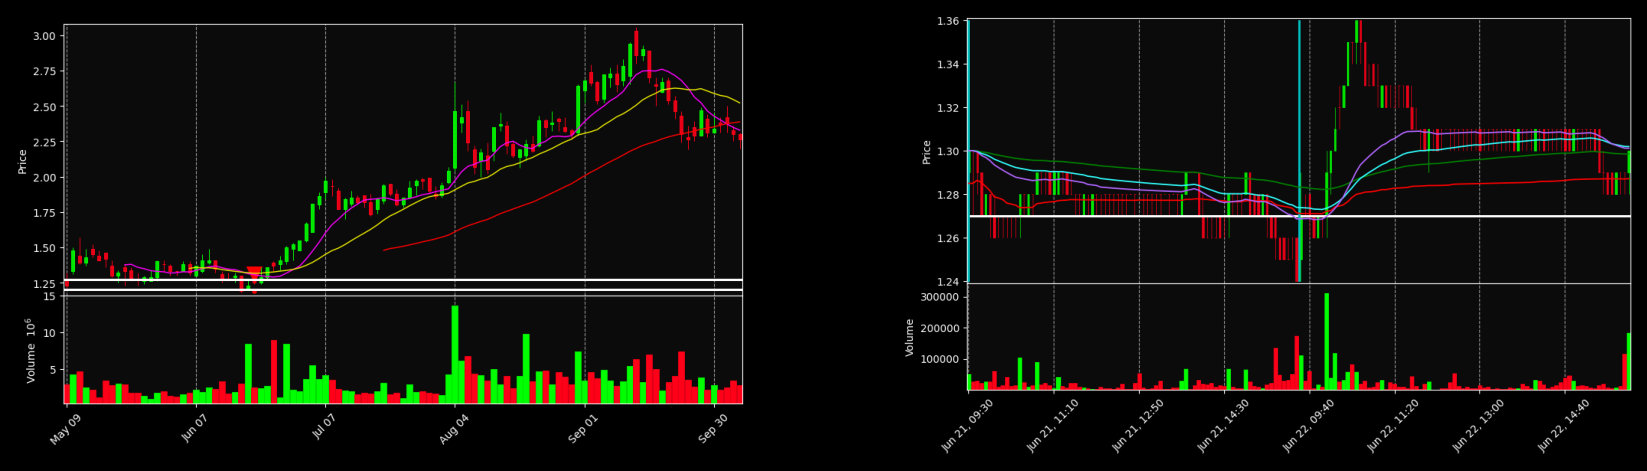

SMFL (2022-06-28)
prevday:            symbol  open  high  low  close  volume
tickTime                                         
2022-06-17   None  0.41  0.43  0.4   0.41  328983


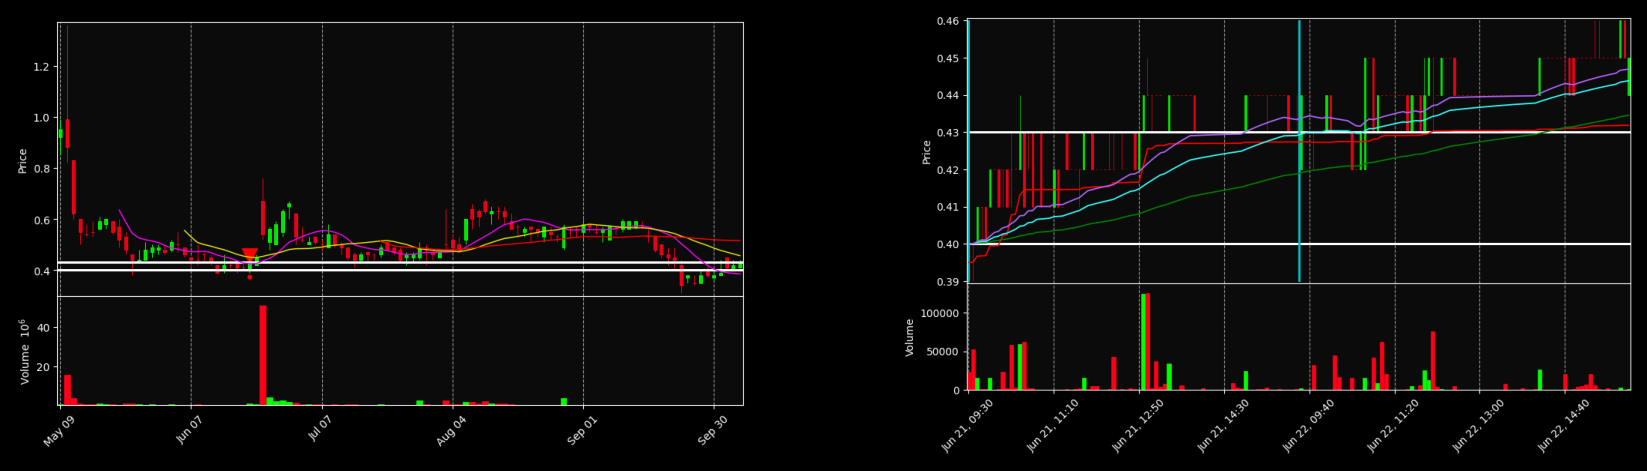

AVEO (2022-06-27)
prevday:            symbol  open  high  low  close  volume
tickTime                                         
2022-06-16   None  4.03   4.2  4.0   4.15  211775
<class 'ValueError'>
User specified line date "2022-06-17 16:00:00" is beyond (greater than) range of plotted data (2022-06-16 09:30:00 to 2022-06-17 15:55:00).
<Response [200]>
{"payload":[{"symbol":null,"open":4.03,"high":4.03,"low":4.03,"close":4.03,"volume":110,"tickTime":"2022-06-16T09:30:00"},{"symbol":null,"open":4.03,"high":4.09,"low":4.03,"close":4.05,"volume":2981,"tickTime":"2022-06-16T09:35:00"},{"symbol":null,"open":4.06,"high":4.07,"low":4.0,"close":4.06,"volume":61819,"tickTime":"2022-06-16T09:40:00"},{"symbol":null,"open":4.06,"high":4.07,"low":4.05,"close":4.07,"volume":830,"tickTime":"2022-06-16T09:45:00"},{"symbol":null,"open":4.09,"high":4.17,"low":4.09,"close":4.17,"volume":2730,"tickTime":"2022-06-16T09:50:00"},{"symbol":null,"open":4.12,"high":4.12,"low":4.12,"close":4.12,"volume":1015,"ti

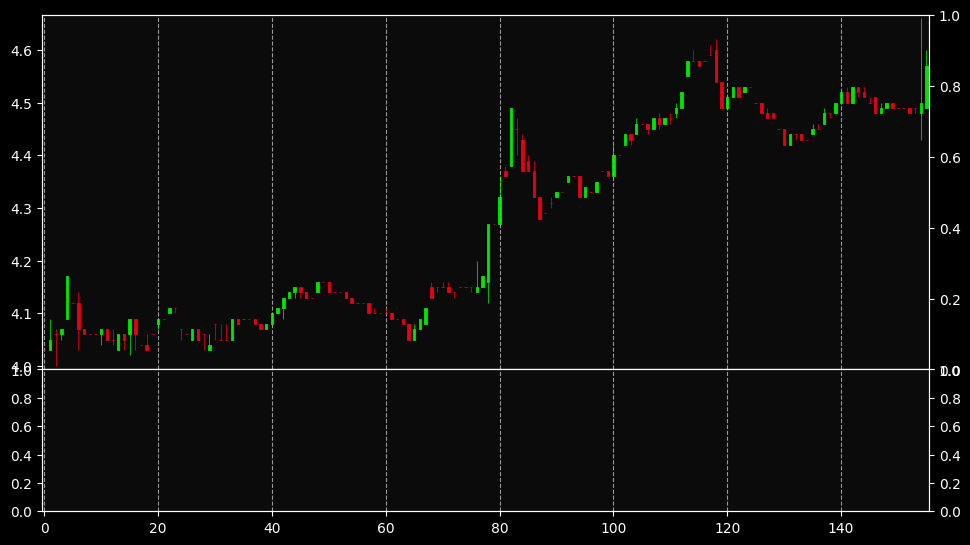

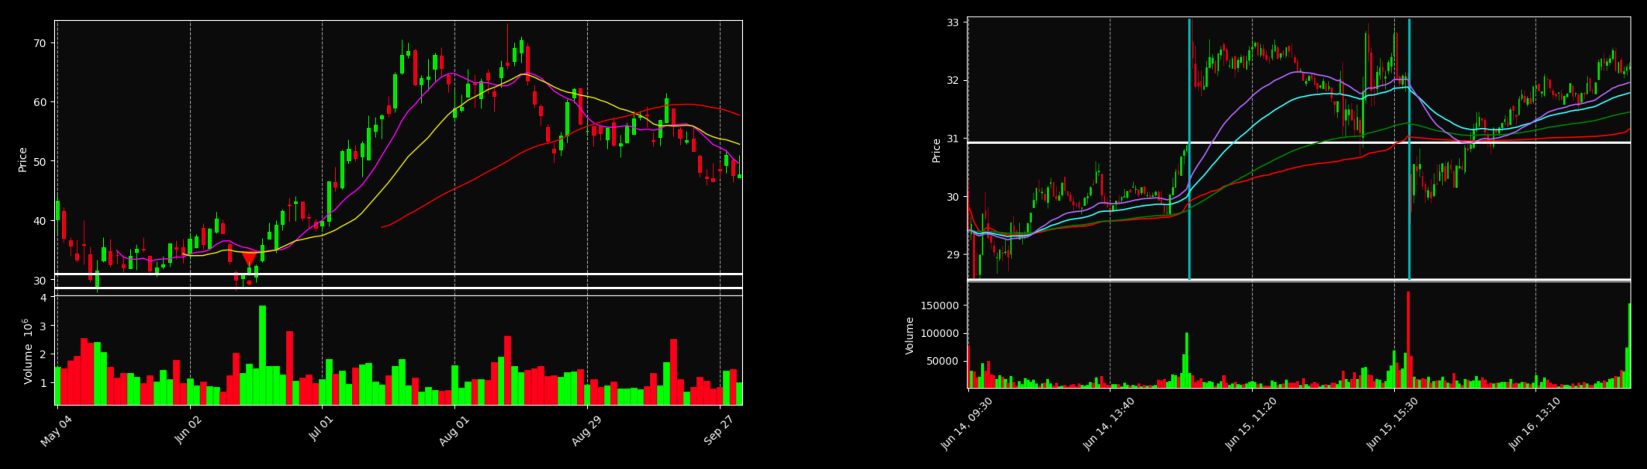

FOLD (2022-06-23)
prevday:            symbol  open  high   low  close   volume
tickTime                                           
2022-06-14   None  7.94  8.06  7.81   7.93  2476603


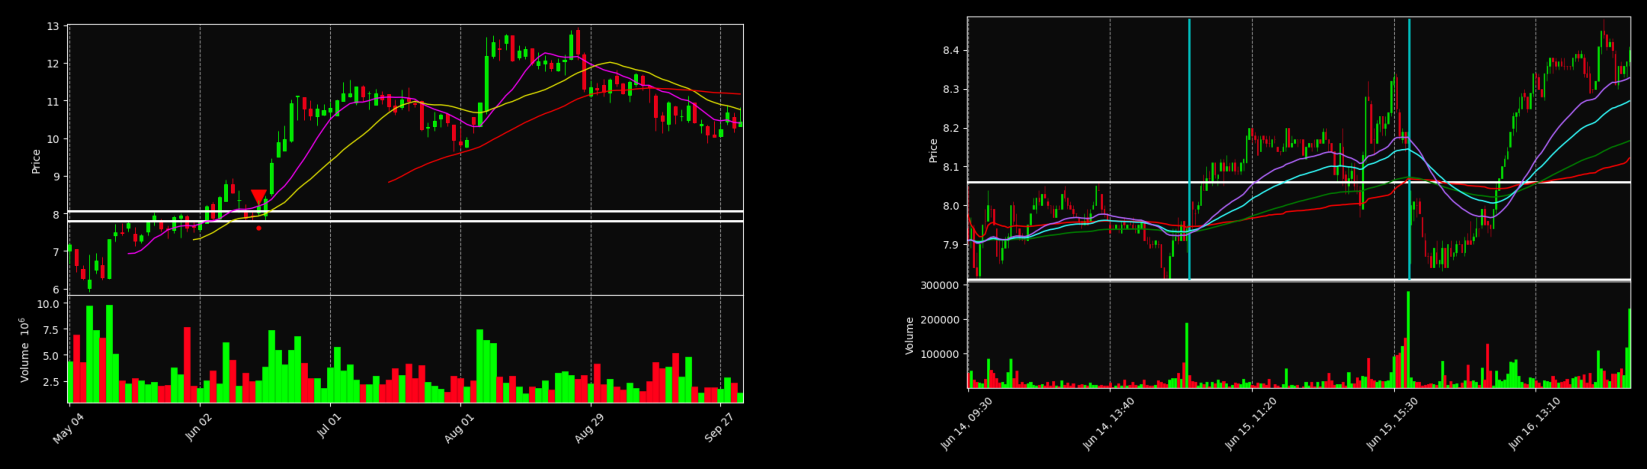

ACLX (2022-06-09)
prevday:            symbol   open   high   low  close  volume
tickTime                                            
2022-06-01   None  11.94  12.35  11.8  12.22   58722


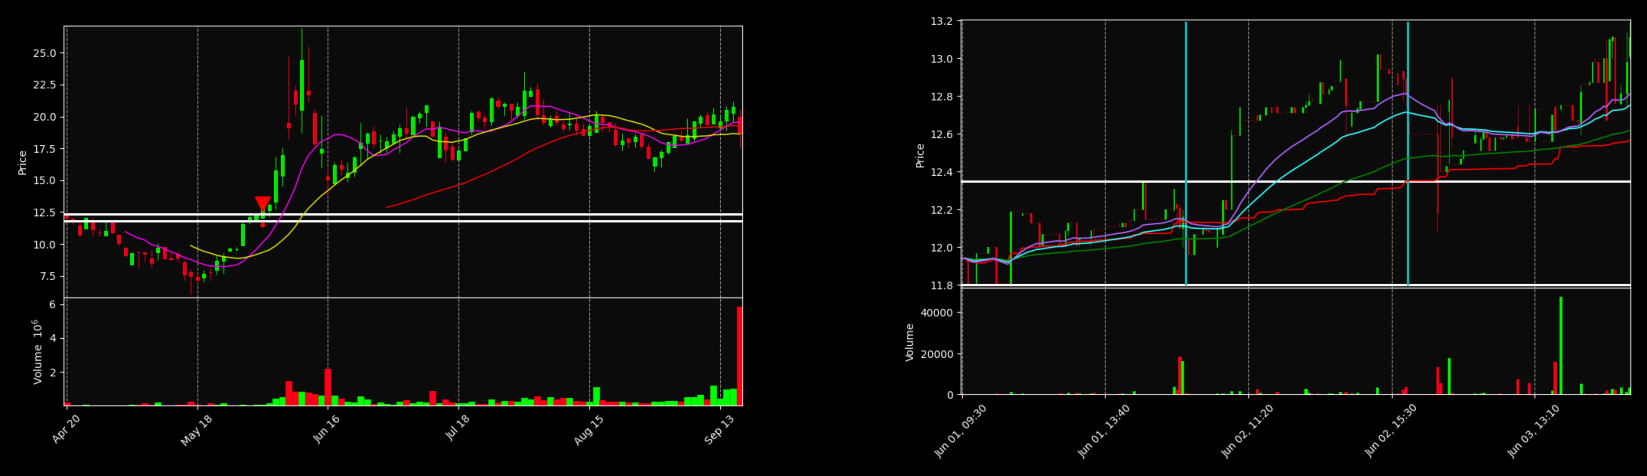

DCFC (2022-05-27)
prevday:            symbol  open  high  low  close  volume
tickTime                                         
2022-05-19   None  8.25   8.3  7.9   8.11  137164
<class 'ValueError'>
User specified line date "2022-05-20 16:00:00" is beyond (greater than) range of plotted data (2022-05-19 09:30:00 to 2022-05-20 15:55:00).
<Response [200]>
{"payload":[{"symbol":null,"open":8.25,"high":8.25,"low":8.25,"close":8.25,"volume":1196,"tickTime":"2022-05-19T09:30:00"},{"symbol":null,"open":8.25,"high":8.25,"low":8.21,"close":8.21,"volume":537,"tickTime":"2022-05-19T09:35:00"},{"symbol":null,"open":8.21,"high":8.3,"low":8.19,"close":8.19,"volume":2778,"tickTime":"2022-05-19T09:40:00"},{"symbol":null,"open":8.14,"high":8.14,"low":8.07,"close":8.07,"volume":688,"tickTime":"2022-05-19T09:45:00"},{"symbol":null,"open":8.05,"high":8.05,"low":7.9,"close":7.96,"volume":3912,"tickTime":"2022-05-19T09:50:00"},{"symbol":null,"open":7.96,"high":8.14,"low":7.96,"close":8.14,"volume":2657,"tick

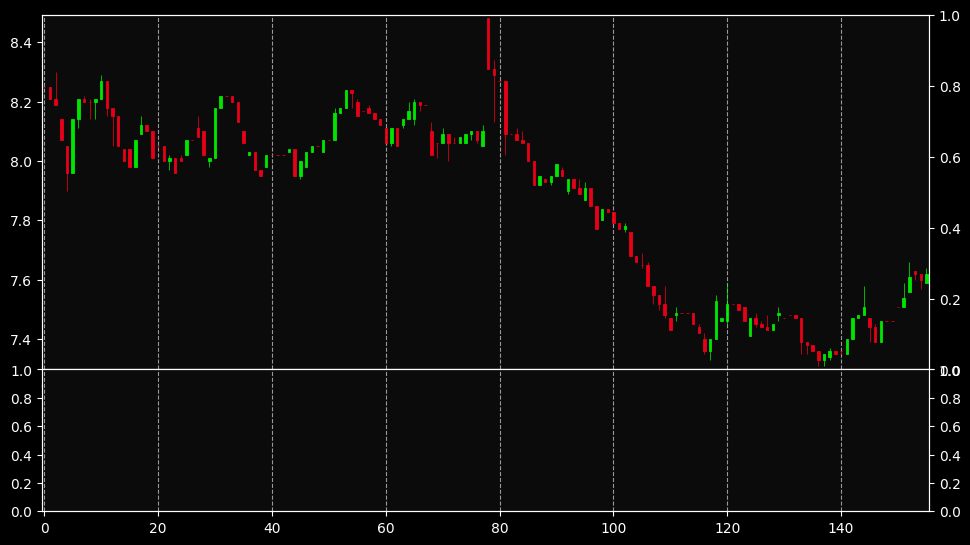

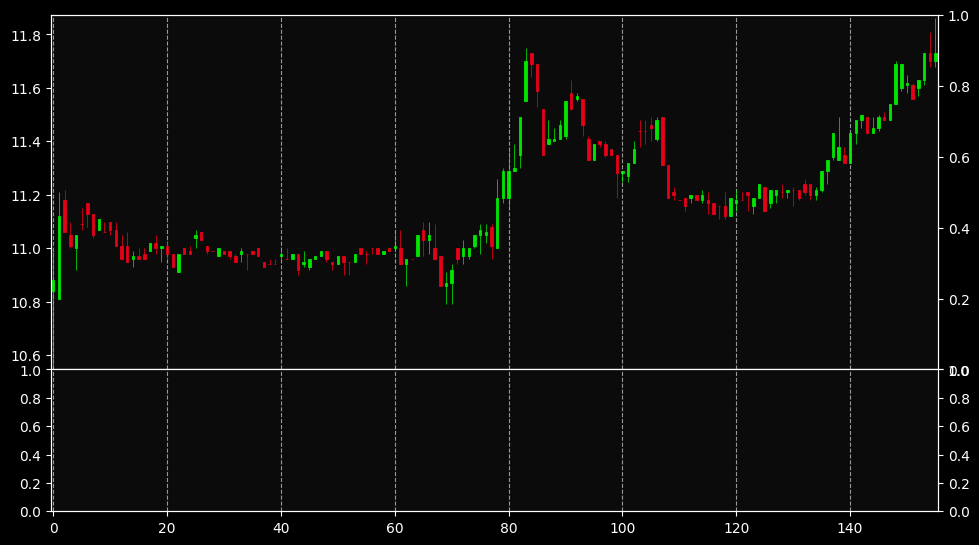

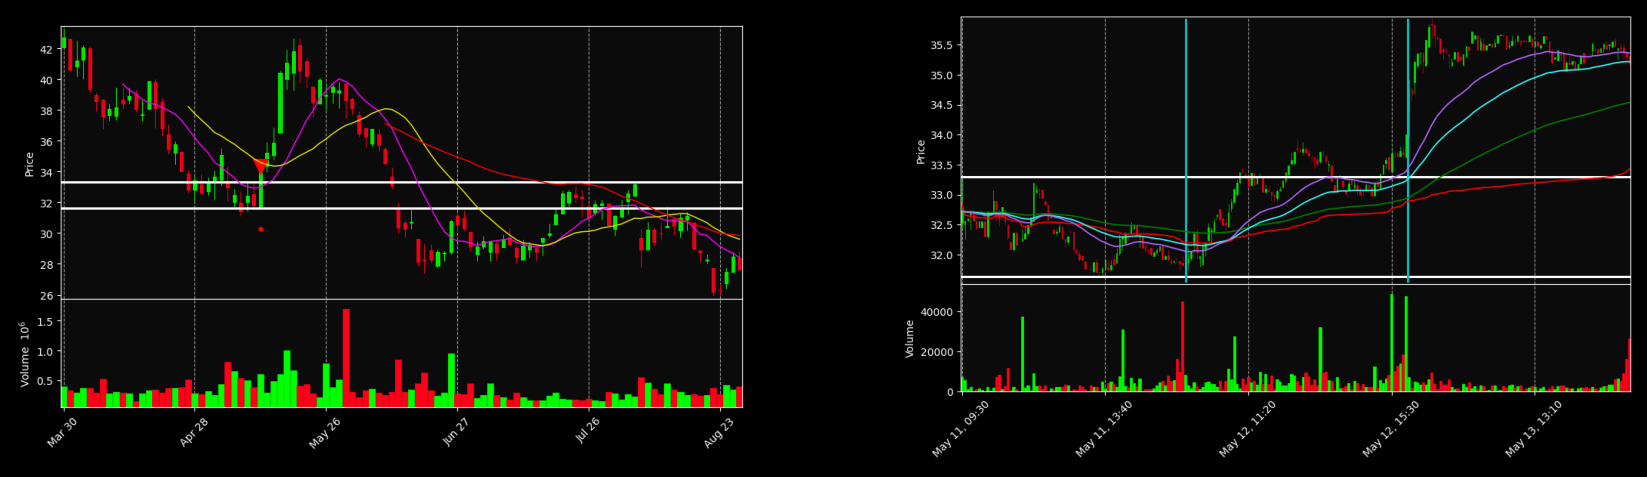

SOFI (2022-05-19)
prevday:            symbol  open  high   low  close    volume
tickTime                                            
2022-05-11   None  5.21  5.61  4.95   5.49  76698148


KeyboardInterrupt: ignored

In [53]:
entryOffset = -5
direction = Direction.SHORT
mc = mpf.make_marketcolors(up='#00ff00',down='#ff0019',inherit=True)
mstyle  = mpf.make_mpf_style(
    base_mpf_style='nightclouds', 
    mavcolors=['magenta','#e6e600','red','green'],
    marketcolors=mc,
    gridaxis='vertical'
  )

for index, row in df.iterrows():
    
    ######################################################
    # fetch daily
    ######################################################
    start = (row['patternTime'] + pd.DateOffset(days=-50)).strftime('%Y-%m-%d')
    end = (row['patternTime'] + pd.DateOffset(days=100)).strftime('%Y-%m-%d')

    url = baseurl + '/chart/' + row['symbol'] + '/d?from=' + encodeUrl(start) + '&to=' + encodeUrl(end)
    chartResponse = requests.get(url)
    chartDf = None
    try:
      chartDf = pd.DataFrame(chartResponse.json()['payload'])
    except Exception as e:
      print(e.__class__)
      print(e)
      print(chartResponse)
      print(chartResponse.text)
      break
    
    chartDf.tickTime = pd.to_datetime(chartDf.tickTime)
    chartDf = chartDf.set_index('tickTime')

    entryDate = row['patternTime']
    entryStr = entryDate.strftime('%Y-%m-%d')
    if (entryOffset!=0):
      idx = chartDf.index.get_loc(entryStr)
      entryStr = chartDf.iloc[[idx+entryOffset]].index.format()[0]
      entryDate = datetime.strptime(entryStr, '%Y-%m-%d')

    print(row['symbol'] + ' (' + row['patternTime'].strftime('%Y-%m-%d') + ')')

    entryPoint1 = None
    entryPoint2 = None
    entryColor = None
    entryMarker = None
    if (direction == Direction.LONG):
      entryPoint1 = np.where(chartDf.index==entryStr, 1, np.nan) * 0.96 * chartDf['low']
      entryPoint2 = np.where(chartDf.index==entryStr, 1, np.nan) * 1.01 * chartDf['high']
      entryColor = 'green'
      entryMarker = '^'
    else:
      entryPoint1 = np.where(chartDf.index==entryStr, 1, np.nan) * 1.01 * chartDf['high']
      entryPoint2 = np.where(chartDf.index==entryStr, 1, np.nan) * 0.96 * chartDf['low']
      entryColor = 'red'
      entryMarker = 'v'

    print('prevday: ' + str(chartDf.iloc[[idx+entryOffset-1]]))
    hlines=(chartDf.iloc[[idx+entryOffset-1]]['low'].values[0], chartDf.iloc[[idx+entryOffset-1]]['high'].values[0])

    addplot = [
        # mpf.make_addplot(chartDf['close'].ewm(span=10, adjust=False).mean(), color='magenta'),
        # mpf.make_addplot(chartDf['close'].ewm(span=21, adjust=False).mean(), color='#e6e600'),
        # mpf.make_addplot(chartDf['close'].ewm(span=50, adjust=False).mean(), color='red'),
        # mpf.make_addplot(chartDf['close'].ewm(span=200,adjust=False).mean(), color='green'),
        mpf.make_addplot(entryPoint1, scatter=True,  type='scatter', markersize=200, marker=entryMarker, color=entryColor),
        mpf.make_addplot(entryPoint2, scatter=True,  type='scatter', markersize=50, marker='.', color=entryColor)
    ]

    imgDailyPlot = io.BytesIO()
    mpf.plot(chartDf[start:end], 
             type='candle', 
             volume=True, 
             mav=(10,20,50,200),
             tight_layout=True, 
             figratio=(16,9), 
             addplot=addplot,
             savefig=imgDailyPlot,
             style=mstyle,
             hlines=hlines)
    _ = imgDailyPlot.seek(0)

    ######################################################
    # fetch intraday
    ######################################################
    start = (entryDate + pd.DateOffset(days=-1)).strftime('%Y-%m-%d')
    end = (entryDate + pd.DateOffset(days=1)).strftime('%Y-%m-%d')

    url = baseurl + '/chart/' + row['symbol'] + '/5m?from=' + encodeUrl(start) + '&to=' + encodeUrl(end)

    imgIntradayPlot = io.BytesIO()
    chartDf = None
    try:
      chartResponse = requests.get(url)
      if chartResponse.status_code != 200:
        imgIntradayPlot = 'dummy.png'
      else:
        chartDf = pd.DataFrame(chartResponse.json()['payload'])
        chartDf.tickTime = pd.to_datetime(chartDf.tickTime)
        chartDf = chartDf.set_index('tickTime')
        chartDf['VWAP'] = (chartDf.volume * (chartDf.high + chartDf.low) / 2).cumsum() / chartDf.volume.cumsum()

        entryStr = entryDate.replace(hour=9, minute=30)

        addplot  = [
            mpf.make_addplot(chartDf['VWAP'], color="red"),
            mpf.make_addplot(chartDf['close'].ewm(span=150, adjust=False).mean(), color='green'),
            mpf.make_addplot(chartDf['close'].ewm(span=63, adjust=False).mean(), color='#33ffff'),
            mpf.make_addplot(chartDf['close'].ewm(span=36, adjust=False).mean(), color='#b266ff'),
        ]

        vlines=[entryStr, entryDate.replace(hour=16, minute=0)]

        mpf.plot(chartDf[start:end], 
                type='candle', 
                volume=True, 
                tight_layout=True, 
                figratio=(16,9),
                savefig=imgIntradayPlot,
                addplot=addplot,
                style=mstyle,
                hlines=hlines,
                vlines=dict(vlines=vlines,colors='c'))
        _ = imgIntradayPlot.seek(0)
    except Exception as e:
      print(e.__class__)
      print(e)
      print(chartResponse)
      print(chartResponse.text)
      continue

    ######################################################
    # render candlestick & perf charts
    ######################################################
    # daily & intraday charts
    img1 = m_img.imread(imgDailyPlot)
    img2 = m_img.imread(imgIntradayPlot)
    fig = plt.figure(figsize=(21,14))
    ax1 = fig.add_subplot(221)
    ax2 = fig.add_subplot(222)
    ax1.set_axis_off()
    ax2.set_axis_off()
    ax1.imshow(img1)
    ax2.imshow(img2)
    plt.show()
